## Load Dataset

In [712]:
import pandas as pd
import numpy as np

clients = pd.read_csv('../data/processed/clients.csv')


In [713]:
clients[clients['client_id'] == 365042657][['client_id','median_promotor_visits']]

,client_id,median_promotor_visits
12405,365042657,20.00


## Explore Class Distributions

In [714]:
# Check balance: include both count and percentage columns
balance_counts = clients['class'].value_counts().rename_axis('class').reset_index(name='count')
balance_percent = clients['class'].value_counts(normalize=True).rename_axis('class').reset_index(name='percentage')
balance = pd.merge(balance_counts, balance_percent, on='class')
(balance)

,class,count,percentage
0,HighTicket_Efficient,19280,0.46
1,LowTicket_Efficient,14993,0.36
2,HighTicket_Inefficient,4137,0.10
3,LowTicket_Inefficient,3540,0.08


In [715]:
hv_ineff = clients[clients['class'] == 'HighTicket_Inefficient'].copy()
lv_ineff = clients[clients['class'] == 'LowTicket_Inefficient'].copy()
hv_efficient= clients[clients['class'] == 'HighTicket_Efficient'].copy()
lv_efficient= clients[clients['class'] == 'LowTicket_Efficient'].copy()

# existing counts
n_hv = len(hv_ineff)
n_lv = len(lv_ineff)

# total inefficient
n_total = n_hv + n_lv

print(f"High‐ticket inefficient clients: {n_hv} rows")
print(f"Low‐ticket inefficient clients:  {n_lv} rows")
print(f"Total inefficient clients:      {n_total} rows")

High‐ticket inefficient clients: 4137 rows
Low‐ticket inefficient clients:  3540 rows
Total inefficient clients:      7677 rows


In [716]:
# Check balance: include both count and percentage columns
balance_counts = clients['class'].value_counts().rename_axis('class').reset_index(name='count')
balance_percent = clients['class'].value_counts(normalize=True).rename_axis('class').reset_index(name='percentage')
balance = pd.merge(balance_counts, balance_percent, on='class')
(balance)

,class,count,percentage
0,HighTicket_Efficient,19280,0.46
1,LowTicket_Efficient,14993,0.36
2,HighTicket_Inefficient,4137,0.10
3,LowTicket_Inefficient,3540,0.08


In [717]:
clients.columns

Index(['client_id', 'city', 'channel', 'promotor_id', 'frequency',
       'efficiency', 'efficiency_scaled', 'total_orders', 'total_volume',
       'total_income', 'total_cost', 'total_profit', 'median_ticket',
       'median_ticket_min', 'median_ticket_max', 'median_ticket_std',
       'median_promotor_visits', 'total_promotor_visits',
       'median_promotor_calls', 'total_promotor_calls', 'class',
       'zero_visit_flag', 'avg_orders_per_month', 'avg_visits_per_month',
       'visit_order_gap', 'inefficiency_cost', 'profit_per_visit',
       'opportunity_cost'],
      dtype='object')

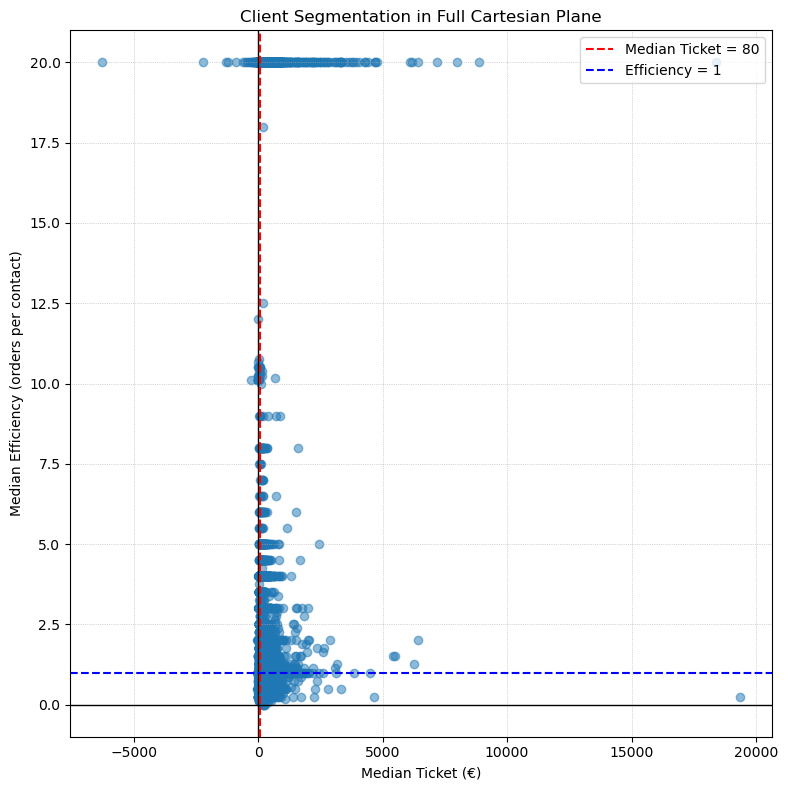

In [718]:
import matplotlib.pyplot as plt

x = clients['median_ticket']
y = clients['efficiency']

plt.figure(figsize=(8,8))

# scatter all points (you can color by quadrant as before)
plt.scatter(x, y, alpha=0.5)

# draw the main axes at zero
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)

# draw your business thresholds
plt.axvline(80, color='red', linestyle='--', label='Median Ticket = 80')
plt.axhline(1,  color='blue', linestyle='--', label='Efficiency = 1')

plt.xlabel('Median Ticket (€)')
plt.ylabel('Median Efficiency (orders per contact)')
plt.title('Client Segmentation in Full Cartesian Plane')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Class Distribution Overview

This section summarizes the distribution of clients across the four main classes:

- **HighTicket_Efficient**
- **LowTicket_Efficient**
- **HighTicket_Inefficient**
- **LowTicket_Inefficient**

| Class                   | Count  | Percentage |
|-------------------------|--------|------------|
| HighTicket_Efficient    | 19,280 | 45.96%     |
| LowTicket_Efficient     | 14,993 | 35.74%     |
| HighTicket_Inefficient  |  4,137 |  9.86%     |
| LowTicket_Inefficient   |  3,540 |  8.44%     |

- The majority of clients are classified as efficient (over 80% combined).
- Inefficient clients make up about 18% of the total, with 4,137 high-ticket and 3,540 low-ticket inefficient clients.
- These distributions provide a foundation for further segmentation and targeted strategy development.

## 1. High-Ticket & Inefficient Client Analysis

### High-Ticket & Inefficient Client Analysis

In [719]:
# Filtering High-Ticket & Inefficient clients
hv_ineff = clients[clients['class'] == 'HighTicket_Inefficient'].copy()

# Reporting table
df_hv_ineff = hv_ineff.reset_index()[[
    'client_id',
    'channel',
    'city',
    'class',
    'median_ticket',
    'promotor_id',
    'total_orders',
    'total_volume',
    'total_income',
    'total_cost',
    'frequency',
    'median_promotor_visits',
    'avg_orders_per_month',
    'avg_visits_per_month',
    'visit_order_gap',
    'efficiency',
    'inefficiency_cost',
    'median_promotor_calls',
    'total_promotor_calls',
    'total_profit',
    'profit_per_visit',
    'opportunity_cost'
]].sort_values('opportunity_cost', ascending=False)

df_hv_ineff['visit_order_gap'] = df_hv_ineff['visit_order_gap'].clip(lower=0)



df_hv_ineff.head(10)


,client_id,channel,city,class,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
1649,468285491,AR,Madrid,HighTicket_Inefficient,"1,316.04",677360818,58,"130,978.10","148,787.96",7540,4.50,8.00,4.83,8.00,3.17,0.56,47.50,0.00,0.00,"141,247.96","1,471.33","4,659.22"
1872,515068007,AR,Barcelona,HighTicket_Inefficient,"19,350.00",417891187,5,"23,887.68","69,335.52",350,1.00,4.00,0.42,1.00,0.58,0.25,8.75,0.00,0.00,"68,985.52","5,748.79","3,353.46"
257,156697011,AR,Alicante,HighTicket_Inefficient,"3,331.80",729030652,16,"218,271.30","80,323.68",1120,2.00,4.00,1.33,2.33,1.00,0.50,15.00,0.00,0.00,"79,203.68","2,828.70","2,828.70"
266,158556116,AR,Tarragona,HighTicket_Inefficient,"1,713.60",513990441,65,"319,792.22","156,768.93",8450,7.00,8.00,5.42,6.67,1.25,0.88,18.75,0.00,0.00,"148,318.93","1,853.99","2,317.48"
2095,566053063,HR,Bilbao,HighTicket_Inefficient,"4,674.30",872524331,6,"5,320.00","35,758.29",420,1.00,4.00,0.50,1.67,1.17,0.25,17.50,0.00,0.00,"35,338.29","1,766.91","2,061.40"
2686,688971420,AR,Alicante,HighTicket_Inefficient,682.50,729030652,65,"104,082.26","74,574.79",8450,5.50,8.00,5.42,8.00,2.58,0.69,38.75,0.00,0.00,"66,124.79",688.80,"1,779.40"
3680,909583679,AR,Sevilla,HighTicket_Inefficient,"2,364.80",739051795,37,"82,508.64","93,841.93",2590,3.00,4.00,3.08,4.00,0.92,0.75,13.75,0.00,0.00,"91,251.93","1,901.08","1,742.66"
3480,867374053,HR,Barcelona,HighTicket_Inefficient,817.50,480416490,40,"31,913.64","38,344.51",5200,3.00,8.00,3.33,8.00,4.67,0.38,70.00,0.00,0.00,"33,144.51",345.26,"1,611.19"
3511,871894926,AR,Sevilla,HighTicket_Inefficient,"1,010.16",491961306,53,"46,907.71","55,243.22",6890,5.00,8.00,4.42,7.33,2.92,0.62,43.75,0.00,0.00,"48,353.22",549.47,"1,602.62"
2385,630756629,AR,Alicante,HighTicket_Inefficient,"1,079.71",39304770,21,"80,746.20","27,320.81",2730,1.50,8.00,1.75,6.67,4.92,0.19,73.75,0.00,0.00,"24,590.81",307.39,"1,511.31"


### a. Distribution of Channels

In [720]:
df_channel_hv_ineff = (
    df_hv_ineff
    .groupby('channel')
    .agg(
        tickets_count         = ('median_ticket',   'count'),
        median_ticket         = ('median_ticket',   'median'),
        median_efficiency     = ('efficiency',      'median'),
        median_visit_order_gap= ('visit_order_gap', 'median')
    )
    .reset_index()
)

df_channel_hv_ineff 

,channel,tickets_count,median_ticket,median_efficiency,median_visit_order_gap
0,AR,2068,123.53,0.50,0.50
1,HR,2069,115.80,0.50,0.58


In [721]:
df_hv_ineff.describe()

,client_id,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
count,"4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00","4,137.00"
mean,"557,035,012.78",168.58,"482,196,032.79",16.70,"3,782.95","3,320.38","1,165.20",1.88,3.27,1.39,2.10,0.71,0.56,10.69,0.18,1.19,"2,155.18",78.87,53.97
std,"260,967,303.15",343.73,"293,659,758.65",14.79,"10,482.93","6,781.88","1,727.40",1.16,1.46,1.23,1.64,0.66,0.17,9.86,0.63,5.03,"6,012.27",154.64,152.63
min,"100,042,162.00",80.00,"4,222,253.00",0.00,0.00,80.00,15.00,0.00,1.00,0.00,0.08,0.00,0.00,-1.25,0.00,0.00,"-18,067.58",-94.10,-330.84
25%,"330,577,695.00",94.69,"229,902,947.00",6.00,585.96,769.68,280.00,1.00,2.00,0.50,0.83,0.25,0.50,3.75,0.00,0.00,377.18,28.55,11.27
50%,"560,182,366.00",119.59,"455,263,770.00",13.00,"1,720.04","1,763.15",600.00,1.50,4.00,1.08,1.67,0.50,0.50,7.50,0.00,0.00,960.30,48.57,24.07
75%,"785,965,139.00",171.31,"701,824,108.00",24.00,"3,820.28","3,722.40","1,750.00",3.00,4.00,2.00,3.67,0.92,0.75,13.75,0.00,0.00,"1,955.63",83.17,49.27
max,"999,756,015.00","19,350.00","998,162,842.00",169.00,"319,792.22","156,768.93","42,250.00",14.00,28.00,14.08,16.00,6.50,0.96,97.50,4.00,48.00,"148,318.93","5,748.79","4,659.22"


### b. Feauture analysis: 
- Visit - Order Gap 
- Profit - Low/ High Margin clients 
- Cost of Opportunity 

In [722]:
inefficiency_cost= df_hv_ineff['inefficiency_cost'].sum().round()
print(f'The cost due to inefficiencies is €{inefficiency_cost:,}')

total_profit = (
    df_hv_ineff['profit_per_visit'] 
  * df_hv_ineff['total_orders']
).sum().round()

print(f'The total profit is €{total_profit:,}')

cost_of_opportunity = df_hv_ineff['opportunity_cost'].sum().round()
print(f'The cost of opportunity is €{cost_of_opportunity:,}')  

median_gap = df_hv_ineff['visit_order_gap'].median()
print(f'The median gap is {median_gap:,}')

avg_gap = df_hv_ineff['visit_order_gap'].std()
print(f'The std gap is {avg_gap:,}')

The cost due to inefficiencies is €44,215.0
The total profit is €6,236,697.0
The cost of opportunity is €223,273.0
The median gap is 0.5
The std gap is 0.6573912740981265


####

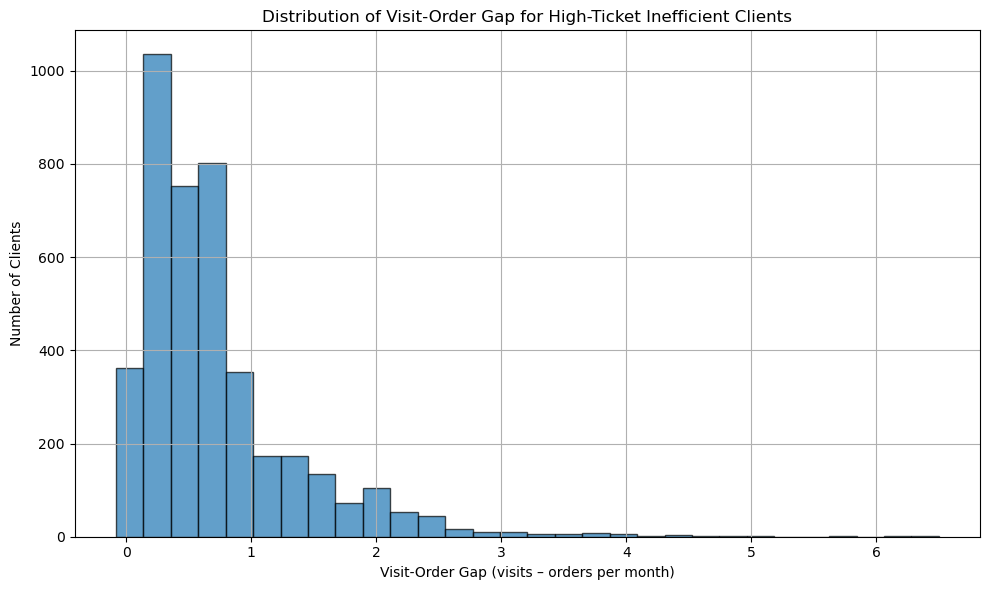

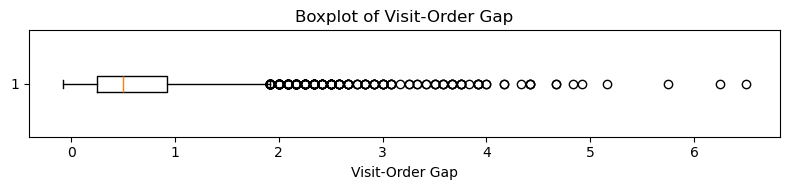

In [723]:
import matplotlib.pyplot as plt
# Extracting the gap
gap = hv_ineff['visit_order_gap'].dropna()

#  Histogram
plt.figure(figsize=(10, 6))
plt.hist(gap, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Visit-Order Gap (visits – orders per month)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Visit-Order Gap for High-Ticket Inefficient Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Boxplot
plt.figure(figsize=(8, 2))
plt.boxplot(gap, vert=False)
plt.xlabel('Visit-Order Gap')
plt.title('Boxplot of Visit-Order Gap')
plt.tight_layout()
plt.show()

In [724]:
# define your bins and labels
bins = [0, 1, 2, gap.max() + 1e-6]   # add a tiny epsilon so the max is included
labels = ['0 ≤ gap < 1', '1 ≤ gap < 2', f'2 ≤ gap ≤ {gap.max():.1f}']

# cut into categories
categories = pd.cut(gap, bins=bins, right=False, labels=labels)

# compute value counts as percentages
pct = categories.value_counts(normalize=True) * 100

for label, p in pct.items():
    print(f"{label}: {p:.2f}% of clients")

0 ≤ gap < 1: 77.38% of clients
1 ≤ gap < 2: 16.98% of clients
2 ≤ gap ≤ 6.5: 5.64% of clients


##### High-Ticket Inefficient Distribution:

~77% of clients have a visit-order gap under 1.

16.98% beteen 1 and below 2 visit gaps

5.64% areoutliers (gap ≥ 2).

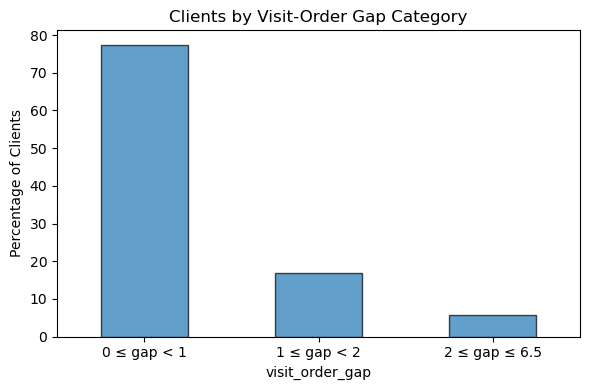

In [725]:
pct.plot.bar(figsize=(6,4), edgecolor='black', alpha=0.7)
plt.ylabel('Percentage of Clients')
plt.title('Clients by Visit-Order Gap Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

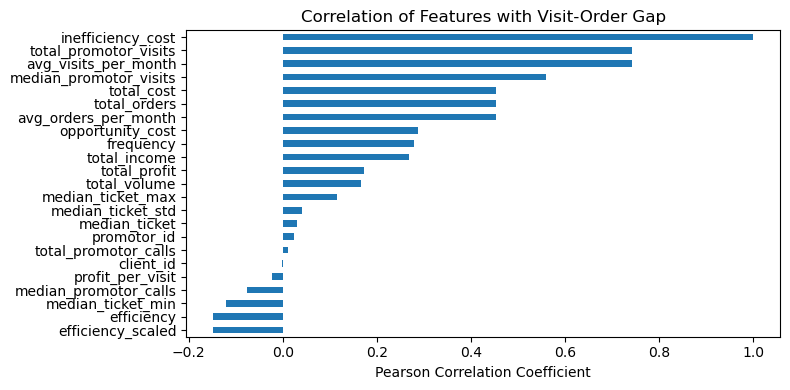

In [726]:
import numpy as np
numeric = hv_ineff.select_dtypes(include=[np.number])
visit_corr = numeric.corr()['visit_order_gap'].drop('visit_order_gap').sort_values()

# 3) Plot bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
visit_corr.plot(kind='barh')
plt.title('Correlation of Features with Visit-Order Gap')
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

##### Profit 
- Profit - Low/ High Margin clients 

margin_segment
high_margin    2069
low_margin     2068
Name: count, dtype: int64
                  count  mean  std   min  25%  50%  75%  max
margin_segment                                              
high_margin    2,069.00  0.58 0.55 -0.08 0.25 0.50 0.67 6.25
low_margin     2,068.00  0.84 0.73 -0.08 0.33 0.58 1.08 6.50


<Figure size 800x500 with 0 Axes>

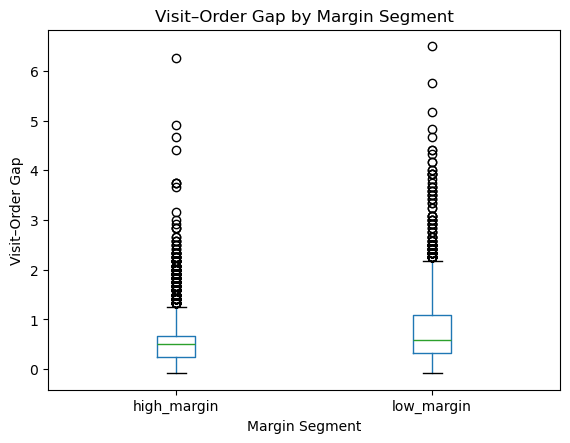

In [727]:
# Compute a margin metric for each client
hv_ineff['profit_margin'] = hv_ineff['total_profit'] / hv_ineff['total_cost']

# Split into “low-margin” vs “high-margin”
#    Here I use the median margin as a cut-off; you can also use quantiles (e.g. pd.qcut) or a business threshold.
median_margin = hv_ineff['profit_margin'].median()
hv_ineff['margin_segment'] = hv_ineff['profit_margin'].apply(
    lambda m: 'low_margin' if m < median_margin else 'high_margin'
)

# Check how many in each segment
print(hv_ineff['margin_segment'].value_counts())

# Compare the visit–order gap distributions
summary = hv_ineff.groupby('margin_segment')['visit_order_gap'].describe()
print(summary)

# Visualize side-by-side
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
hv_ineff.boxplot('visit_order_gap', by='margin_segment', grid=False)
plt.suptitle('')
plt.title('Visit–Order Gap by Margin Segment')
plt.xlabel('Margin Segment')
plt.ylabel('Visit–Order Gap')
plt.show()

In [728]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

grouped = hv_ineff.groupby('margin_segment')['visit_order_gap']
summary = grouped.agg(count='count', mean='mean', median='median', std='std')
print("Summary statistics by margin segment:\n", summary)

high_gap = hv_ineff.loc[hv_ineff.margin_segment=='high_margin', 'visit_order_gap']
low_gap  = hv_ineff.loc[hv_ineff.margin_segment=='low_margin',  'visit_order_gap']

# 3) Welch’s t-test (doesn’t assume equal variances)
t_stat, p_val = ttest_ind(low_gap, high_gap, equal_var=False)
print(f"\nWelch’s t-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 4) Mann–Whitney U (non-parametric)
u_stat, p_u = mannwhitneyu(low_gap, high_gap, alternative='two-sided')
print(f"Mann–Whitney U: U = {u_stat:.3f}, p = {p_u:.3f}")


Summary statistics by margin segment:
                 count  mean  median  std
margin_segment                          
high_margin      2069  0.58    0.50 0.55
low_margin       2068  0.84    0.58 0.73

Welch’s t-test: t = 12.723, p = 0.000
Mann–Whitney U: U = 2640953.000, p = 0.000


Welch’s t-test:
What it tests: Difference in group means.

Mann–Whitney U:
What it tests: Interpreted as a test of whether values in one group tend to be larger than in the other.

Insight: Low-margin in HighTicket_Inefficient clients really do have noticeably larger visit–order

Mean difference: 0.84 – 0.585 ≈ 0.255 visits/month

Median difference: 0.583 – 0.500 = 0.083 visits/month

Both the Welch’s t-test (t = 12.72, p < 0.001) and Mann–Whitney U (p < 0.001) confirm that this difference is highly statistically significant.

In [729]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Selecting your extended feature list
features = [
    'avg_visits_per_month',
    'total_promotor_visits',
    'total_orders',
    'total_cost',
    'total_income',
    'total_profit',
    'frequency',
    'efficiency',
    'efficiency_scaled',
    'profit_margin'
]

X = hv_ineff[features]
y = hv_ineff['visit_order_gap']

# Fiting a simple RF
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


importances = pd.Series(model.feature_importances_, index=features)
print("Feature importances (RF):")
print(importances.sort_values(ascending=False))

# Quick 5-fold CV to get an R² estimate
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n5-fold CV R²: {scores.mean():.3f} ± {scores.std():.3f}")


Feature importances (RF):
avg_visits_per_month    0.35
total_promotor_visits   0.29
efficiency              0.15
efficiency_scaled       0.14
total_orders            0.04
total_cost              0.02
frequency               0.00
profit_margin           0.00
total_income            0.00
total_profit            0.00
dtype: float64

5-fold CV R²: 0.978 ± 0.015


The visit volume is the strongest driver of inefficiency for both. Profit-related fields (profit_margin, total_profit) have almost zero predictive value for the visit gap — which supports the idea that profit is a result of inefficiency, not its cause.


Regardless of ticket size, inefficiency is:

 - Behavioral (too many visits)

- Not driven by profit size

### c. Rgression Analysis

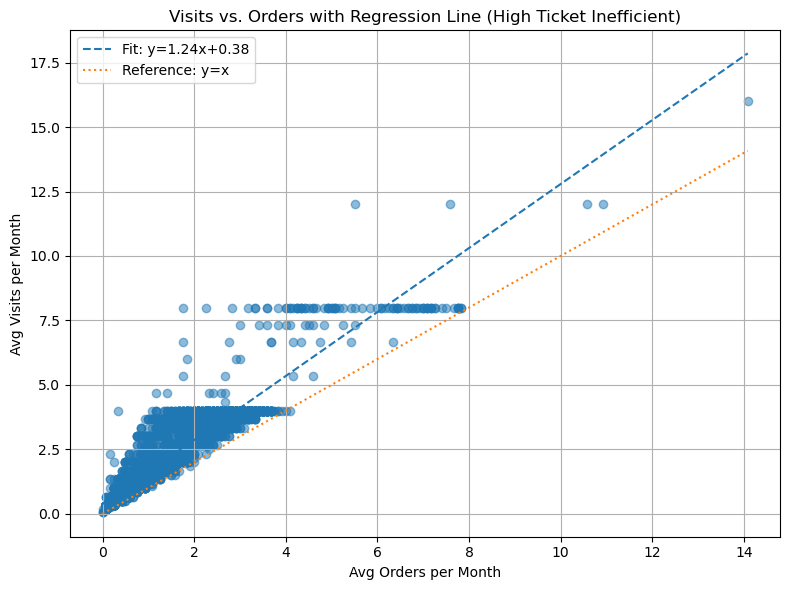

In [730]:
# Prepare data
x = hv_ineff['avg_orders_per_month']
y = hv_ineff['avg_visits_per_month']

#  Fit a linear regression line
slope, intercept = np.polyfit(x, y, deg=1)

# Line endpoints
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x_line, y_line, linestyle='--', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.plot(x_line, x_line, linestyle=':', label='Reference: y=x')

plt.xlabel('Avg Orders per Month')
plt.ylabel('Avg Visits per Month')
plt.title('Visits vs. Orders with Regression Line (High Ticket Inefficient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Regression Visualization
    visits > orders (obviously inefficient):

High-Ticket: y ≈ 1.24x + 0.38

Low-Ticket: y ≈ 1.28x + 0.33

For every 1 more order per month, promotors are making 1.24 more visits on average. This reflects inefficiency  promotors must visit more than once to get an order.
0.38 (intercept):	Even if a client places 0 orders, they still get ~0.38 visits per month — likely baseline/check-in visits.
Promotors are making ~24% more visits than the number of orders

Insight: The structure of inefficiency is the same: Promotors keep visiting even when orders don’t come. This means inefficiency isn’t a data noise

In [731]:
# drop extreme order‐volume outliers
mask = hv_ineff['avg_orders_per_month'] <= 30
hv_typical = hv_ineff[mask]

# fit again
slope_t, intercept_t = np.polyfit(
    hv_typical['avg_orders_per_month'],
    hv_typical['avg_visits_per_month'],
    deg=1
)
print(f"Refit slope (orders≤30): {slope_t:.2f}")


Refit slope (orders≤30): 1.24


## 1.1 Grouping Clients
#### K-Means Clustering of High-Ticket Inefficient Clients

In this section,  apply K-Means clustering to the High-Ticket Inefficient client segment to identify subgroups with similar behavioral and financial characteristics. This will help tailor strategies for reducing inefficiency and optimizing promotor visits.

#### Steps:
1. Select relevant features for clustering (orders, ticket size, visits, gap, costs).
2. Fit a K-Means model and assign cluster labels.
4. Summarize and visualize the resulting clusters.
5. Analyze the financial impact and visit optimization opportunities per cluster.

In [732]:
hv_clustering_features = [
    'total_orders',
    'median_ticket',
    'avg_visits_per_month',
    'avg_orders_per_month',
    'visit_order_gap',
    'inefficiency_cost',
    'opportunity_cost',
    
]
from sklearn.preprocessing import StandardScaler

X = df_hv_ineff[hv_clustering_features]  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [733]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_hv_ineff['cluster'] = kmeans.fit_predict(X_scaled)

In [734]:
# 1. Total opportunity cost per cluster
opportunity_cost_total = df_hv_ineff.groupby('cluster')['opportunity_cost'].sum().round(2).rename('Total_Opportunity_Cost')

cluster_counts = df_hv_ineff['cluster'].value_counts().rename('Clients')

# Median values of relevant features
cluster_medians = df_hv_ineff.groupby('cluster')[hv_clustering_features].mean().round(2)

# Combining  all into one summary table
df_cluster_summary = pd.concat([cluster_medians, cluster_counts, opportunity_cost_total], axis=1).reset_index()

# Sorting by Clients (descending)
df_cluster_summary = df_cluster_summary.sort_values(by='Clients', ascending=False).reset_index(drop=True)

(df_cluster_summary)


,cluster,total_orders,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Clients,Total_Opportunity_Cost
0,0,8.77,154.64,1.15,0.73,0.42,6.23,26.81,2770,"74,268.94"
1,1,36.87,158.23,3.96,3.07,0.89,13.36,69.85,912,"63,703.44"
2,3,24.59,232.16,4.22,2.05,2.17,32.51,180.50,454,"81,947.64"
3,2,5.00,"19,350.00",1.00,0.42,0.58,8.75,"3,353.46",1,"3,353.46"


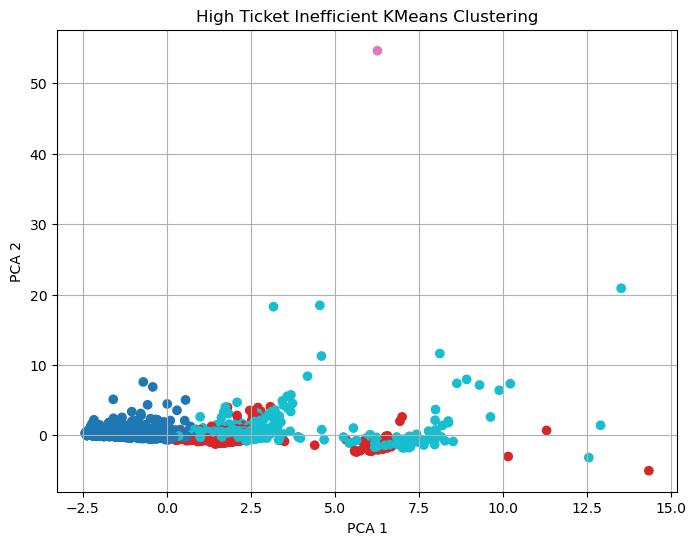

In [735]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

hv_pca = PCA(n_components=2)
hv_X_pca = hv_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(hv_X_pca[:, 0], hv_X_pca[:, 1], c=df_hv_ineff['cluster'], cmap='tab10')
plt.title('High Ticket Inefficient KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [736]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_hv_ineff['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.552


In [737]:
df_cluster_summary

,cluster,total_orders,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Clients,Total_Opportunity_Cost
0,0,8.77,154.64,1.15,0.73,0.42,6.23,26.81,2770,"74,268.94"
1,1,36.87,158.23,3.96,3.07,0.89,13.36,69.85,912,"63,703.44"
2,3,24.59,232.16,4.22,2.05,2.17,32.51,180.50,454,"81,947.64"
3,2,5.00,"19,350.00",1.00,0.42,0.58,8.75,"3,353.46",1,"3,353.46"


In [738]:
# Computing count, mean and std, max, min of visit_order_gap per cluster
gap_stats = df_hv_ineff.groupby('cluster')['visit_order_gap'] \
           .agg(count='count', mean='mean', std='std', max= 'max', min = 'min') \
           .round(2) \
           .reset_index()

print(gap_stats)

   cluster  count  mean  std  max  min
0        0   2770  0.42 0.26 1.50 0.00
1        1    912  0.89 0.34 2.17 0.00
2        2      1  0.58  NaN 0.58 0.58
3        3    454  2.17 0.75 6.50 0.92


## 1.2 Cluster Description

#### Cluster 0 (2 770 clients) “Every-Visit Converters”

Visits vs orders: ~1.2 visits for ~0.7 orders per month

Gap: 0.42 (almost one-to-one)

Behavior:  These €116 median order clients almost always place an order on each visit.


#### Cluster 1 (912 clients) “Moderate Visits”

Visits vs orders: 4 visits for 3 orders per month

Gap: 0.89

Behavior:  These €120 median order clients make almost three orders but visit four times about one extra visit per order

#### Cluster 2 (1 client) “VIP Client"

Visits vs orders: 1 visit for 0.6 orders per month

Gap: 0.58

Behavior: A single very‐high‐value account that visits a bit more than it orders.

#### Cluster 3 (454 clients) “High Visits”

Visits vs orders: 4 visits for 2 orders per month

Gap: 2.17

Behavior: These €144 median order clients visit twice as much as they order.

## 1.3 Recommended Strategy for High Ticket Innefficient Clients


All High-Ticket Inefficient clients have a median_ticket ≥ 80, so:

They’re still profitable per order, but high cost of opportunity

The inefficiency comes from wasting promotors' time  not lack of value.

**Strategy per cluster:**

✅ Reduce the visit-order gap across all segments:

#### Cluster 0 

Mean 0.42, max 1.50, tight std=0.26

→ Drive to 0.

#### Cluster 1 

Mean 0.89, std=0.34, some already at 0, a few up to 2+

→ Still reasonable to target 0 (catches most within one std).

### Cluster 2 

Single client personalize attention to target 0 to fully align.

#### Cluster 3 

Mean 2.17, std=0.75, wide spread up to 6.5

Target 2 as a gap because the cluster has a significant spread, some clients income could be affected if a more agressive stategy would be immplemented


### 1.4 High Ticket - Inneficient Clients Optimized Data frame

In [739]:
import numpy as np
import pandas as pd

df_hv_ineff_optimized = df_hv_ineff.copy()

# Step 1: Define target gap per cluster
target_gap_map = {
    0: 0,  # Cluster 0 → reduce to 0
    1: 0,  # Cluster 1 → reduce to 0
    2: 0,  # Cluster 2 → reduce to 0
    3: 2   # Cluster 3 → cap at 2
}
df_hv_ineff_optimized['target_gap'] = df_hv_ineff_optimized['cluster'].map(target_gap_map)

# Step 2: Set the cost per promotor visit
visit_cost = 15

# Step 3: Compute how much gap to reduce
df_hv_ineff_optimized['gap_reduction'] = (
      df_hv_ineff_optimized['visit_order_gap']
    - df_hv_ineff_optimized['target_gap']
).clip(lower=0)

# Step 4: Compute visits_removed by rounding gap to nearest whole visit
df_hv_ineff_optimized['visits_removed'] = (
    df_hv_ineff_optimized['gap_reduction']
      .round(0)        # round to nearest integer
      .astype(int)     # cast to int
)

# Step 5: Compute optimized remaining visits, never below zero
df_hv_ineff_optimized['new_visits'] = (
    df_hv_ineff_optimized['avg_visits_per_month']
  - df_hv_ineff_optimized['visits_removed']

)

df_hv_ineff_optimized['new_visits'] = (
    df_hv_ineff_optimized['new_visits']
    .clip(lower=0)    # ensure no negative visits
    .astype(int)
)

# Step 5: Estimated savings = visits_removed × visit_cost
df_hv_ineff_optimized['estimated_savings'] = (
    df_hv_ineff_optimized['visits_removed'] * visit_cost
)

# Step 6: Recompute optimized_gap (for opportunity‐cost scaling)
df_hv_ineff_optimized['new_gap'] = (
      df_hv_ineff_optimized['visit_order_gap']
    - df_hv_ineff_optimized['gap_reduction']
).clip(lower=0)


# Step 7: Simulate optimized opportunity cost
df_hv_ineff_optimized['new_opportunity_cost'] = (
      df_hv_ineff_optimized['opportunity_cost']
    * (df_hv_ineff_optimized['new_gap'] 
       / df_hv_ineff_optimized['visit_order_gap'])
).replace([np.inf, -np.inf], 0) \
 .fillna(0)


# Step 8: Calculate recovered opportunity cost
df_hv_ineff_optimized['recovered_opportunity_cost'] = (
      df_hv_ineff_optimized['opportunity_cost']
    - df_hv_ineff_optimized['new_opportunity_cost']
).clip(lower=0)

#Step 9: Calculating the new efficiency

hv_orig_eff = df_hv_ineff_optimized['efficiency']   # your pre‐opt column

df_hv_ineff_optimized['Optimized_efficiency'] = np.where(
    df_hv_ineff_optimized['new_visits'] > 0,
    df_hv_ineff_optimized['avg_orders_per_month'] 
      / df_hv_ineff_optimized['new_visits'],
    hv_orig_eff
)

#Step 10: Annual features

df_hv_ineff_optimized['new_annual_visits'] = (
    df_hv_ineff_optimized['new_visits']*12
)

df_hv_ineff_optimized['new_annual_visit_cost'] = (
    df_hv_ineff_optimized['new_visits']* visit_cost
)


df_hv_ineff_optimized['annual_estimated_savings'] = (
    df_hv_ineff_optimized['estimated_savings']* 12
)


df_hv_ineff_optimized['Annual_recover_cost_op'] = (
    df_hv_ineff_optimized['recovered_opportunity_cost']* 12
)

df_hv_ineff_optimized['annual_removed_visits'] = (
    df_hv_ineff_optimized['visits_removed']* 12

)

cols_to_round = [
    'visit_order_gap','new_gap','gap_reduction',
    'new_visits','estimated_savings', 'Optimized_efficiency',
    'opportunity_cost','new_opportunity_cost',
    'recovered_opportunity_cost'
]
df_hv_ineff_optimized[cols_to_round] = df_hv_ineff_optimized[cols_to_round].round(2)

# Step 11: Quadrant name
df_hv_ineff_optimized['group'] = 'HighTicket_Inefficient'

# Step 12: Map cluster IDs to readable names
cluster_name_map = {
    0: 'Every Visit Converters',
    1: 'Moderate Visits',
    2: 'VIP Client',
    3: 'High Visits'
}
df_hv_ineff_optimized['cluster_name'] = df_hv_ineff_optimized['cluster'].map(cluster_name_map)


# Set display format
pd.set_option('display.float_format','{:,.2f}'.format)


pd.set_option('display.max_columns', None)
df_hv_ineff_optimized.head()


,client_id,channel,city,class,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost,cluster,target_gap,gap_reduction,visits_removed,new_visits,estimated_savings,new_gap,new_opportunity_cost,recovered_opportunity_cost,Optimized_efficiency,new_annual_visits,new_annual_visit_cost,annual_estimated_savings,Annual_recover_cost_op,annual_removed_visits,group,cluster_name
1649,468285491,AR,Madrid,HighTicket_Inefficient,"1,316.04",677360818,58,"130,978.10","148,787.96",7540,4.50,8.00,4.83,8.00,3.17,0.56,47.50,0.00,0.00,"141,247.96","1,471.33","4,659.22",3,2,1.17,1,7,15,2.00,"2,942.67","1,716.56",0.69,84,105,180,"20,598.66",12,HighTicket_Inefficient,High Visits
1872,515068007,AR,Barcelona,HighTicket_Inefficient,"19,350.00",417891187,5,"23,887.68","69,335.52",350,1.00,4.00,0.42,1.00,0.58,0.25,8.75,0.00,0.00,"68,985.52","5,748.79","3,353.46",2,0,0.58,1,0,15,0.00,0.00,"3,353.46",0.25,0,0,180,"40,241.55",12,HighTicket_Inefficient,VIP Client
257,156697011,AR,Alicante,HighTicket_Inefficient,"3,331.80",729030652,16,"218,271.30","80,323.68",1120,2.00,4.00,1.33,2.33,1.00,0.50,15.00,0.00,0.00,"79,203.68","2,828.70","2,828.70",3,2,0.00,0,2,0,1.00,"2,828.70",0.00,0.67,24,30,0,0.00,0,HighTicket_Inefficient,High Visits
266,158556116,AR,Tarragona,HighTicket_Inefficient,"1,713.60",513990441,65,"319,792.22","156,768.93",8450,7.00,8.00,5.42,6.67,1.25,0.88,18.75,0.00,0.00,"148,318.93","1,853.99","2,317.48",3,2,0.00,0,6,0,1.25,"2,317.48",0.00,0.90,72,90,0,0.00,0,HighTicket_Inefficient,High Visits
2095,566053063,HR,Bilbao,HighTicket_Inefficient,"4,674.30",872524331,6,"5,320.00","35,758.29",420,1.00,4.00,0.50,1.67,1.17,0.25,17.50,0.00,0.00,"35,338.29","1,766.91","2,061.40",3,2,0.00,0,1,0,1.17,"2,061.40",0.00,0.50,12,15,0,0.00,0,HighTicket_Inefficient,High Visits


In [740]:
df_hv_ineff_optimized.shape

(4137, 39)

High Ticket MONTHLY VISITS REMOVED:

In [741]:
hv_monthly_visits_removed= df_hv_ineff_optimized['visits_removed'].sum()

print(f'The monthly visits removed with the strategy are: {hv_monthly_visits_removed}')

hv_annual_visits_removed= hv_monthly_visits_removed*12

print(f'The annual visits removed with the strategy are: {hv_annual_visits_removed}')


The monthly visits removed with the strategy are: 1753
The annual visits removed with the strategy are: 21036


HV MONTHLY VISITS REMOVED PER CLUSTER:

In [742]:
hv_clusters_removed_visits= df_hv_ineff_optimized.groupby('cluster')['visits_removed'].sum()
hv_clusters_removed_visits

cluster
0    831
1    798
2      1
3    123
Name: visits_removed, dtype: int64

## 1.5  Savings

#### Monthly Savings Analysis

This section quantifies the monthly impact of optimizing promotor visits for High-Ticket Inefficient clients:

- **Estimated Cost Savings:** Direct reduction in promotor visit costs after applying the optimized strategy.
- **Recovered Opportunity Cost:** Additional value captured by reducing inefficiency and aligning visits with actual order patterns.
- **Total Impact:** Combined effect of both cost savings and recovered opportunity cost.

The following analyses and visualizations break down these savings by cluster, highlighting where the greatest improvements can be achieved. This provides actionable insights for prioritizing operational changes and maximizing monthly financial benefits.

In [743]:
# Estimating savings
est_sav = (
    df_hv_ineff_optimized
      .groupby('cluster')['estimated_savings']
      .sum()
      .to_frame()
)

est_sav.loc['Total'] = est_sav['estimated_savings'].sum()


est_sav.style.format({"estimated_savings": "{:,.0f}"})


,estimated_savings
cluster,
0,"12,465"
1,"11,970"
2,15
3,"1,845"
Total,"26,295"


In [744]:
recov = (
    df_hv_ineff_optimized
      .groupby('cluster')['recovered_opportunity_cost']
      .sum()
      .to_frame()
)
recov.loc['Total'] = recov['recovered_opportunity_cost'].sum()
print(recov)

         recovered_opportunity_cost
cluster                            
0                         74,363.89
1                         64,022.48
2                          3,353.46
3                         10,617.21
Total                    152,357.04


In [745]:

# Computing per‐cluster sums
est_sav = df_hv_ineff_optimized.groupby('cluster')['estimated_savings'].sum()
recov   = df_hv_ineff_optimized.groupby('cluster')['recovered_opportunity_cost'].sum()

# Building the summary table
hv_summary = pd.concat([est_sav, recov], axis=1)
hv_summary.columns = ['Estimated Savings', 'Recovered Opportunity Cost']

# Adding a Total Impact column 
hv_summary['Total Impact'] = hv_summary['Estimated Savings'] + hv_summary['Recovered Opportunity Cost']

# Append the grand‐total row
hv_summary.loc['Total'] = hv_summary.sum()

# Format
formatted = hv_summary.copy()
formatted['Estimated Savings']          = formatted['Estimated Savings'].map("{:,.0f}".format)
formatted['Recovered Opportunity Cost'] = formatted['Recovered Opportunity Cost'].map("{:,.2f}".format)
formatted['Total Impact']               = formatted['Total Impact'].map("{:,.2f}".format)

print(formatted)


        Estimated Savings Recovered Opportunity Cost Total Impact
cluster                                                          
0                  12,465                  74,363.89    86,828.89
1                  11,970                  64,022.48    75,992.48
2                      15                   3,353.46     3,368.46
3                   1,845                  10,617.21    12,462.21
Total              26,295                 152,357.04   178,652.04


Cluster 0: Gives the biggest overall gain (86 K), mostly by recovering lost profit.

Cluster 1: Follows close behind at 75 K in total impact.

Cluster 2: Only one client—so it only adds €3 K.

Cluster 3: Adds a useful €12 K despite being smaller.


Altogether, fixing visit gaps in these high-ticket clients frees up €178 K per month

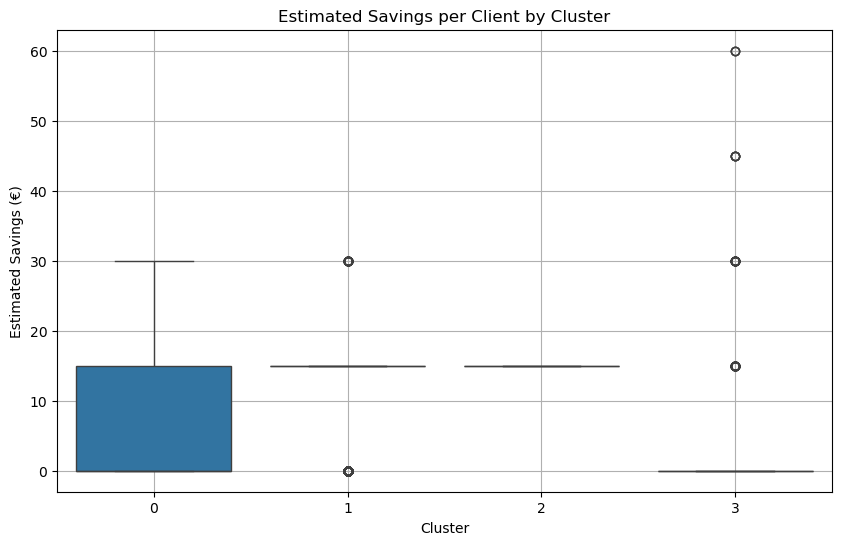

In [746]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='estimated_savings', data= df_hv_ineff_optimized)
plt.title('Estimated Savings per Client by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Estimated Savings (€)')
plt.grid(True)
plt.show()

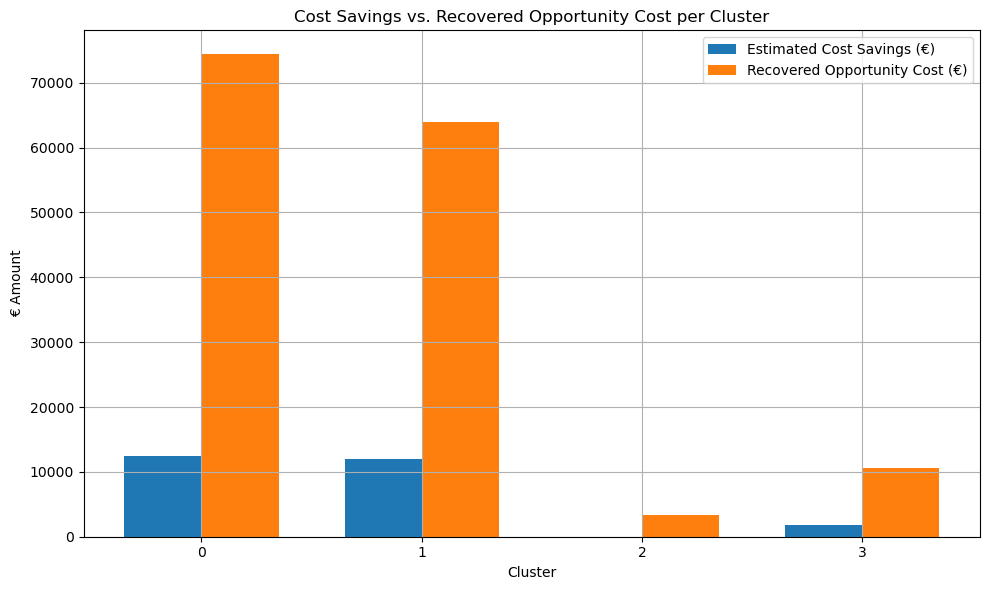

In [747]:
import matplotlib.pyplot as plt

#  Group by cluster to sum the two key metrics
cluster_financials = df_hv_ineff_optimized.groupby('cluster')[
    ['estimated_savings', 'recovered_opportunity_cost']
].sum().reset_index()

#  Set up for plotting
x = cluster_financials['cluster']
bar_width = 0.35

plt.figure(figsize=(10, 6))

# Bar plot: cost savings
plt.bar(
    x - bar_width/2,
    cluster_financials['estimated_savings'],
    width=bar_width,
    label='Estimated Cost Savings (€)'
)

# Bar plot: recovered opportunity cost
plt.bar(
    x + bar_width/2,
    cluster_financials['recovered_opportunity_cost'],
    width=bar_width,
    label='Recovered Opportunity Cost (€)'
)

# Styling and labels
plt.xlabel('Cluster')
plt.ylabel('€ Amount')
plt.title('Cost Savings vs. Recovered Opportunity Cost per Cluster')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


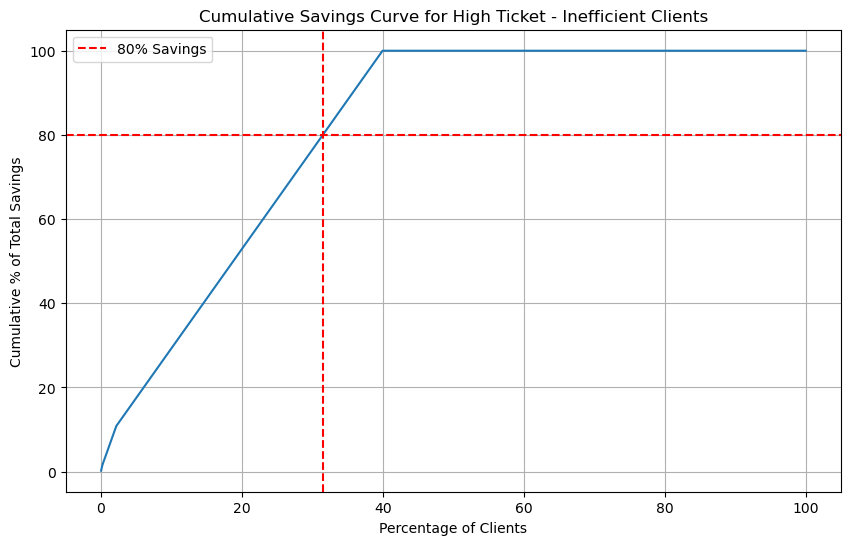

In [748]:
import numpy as np

# Sort clients by savings descending
sorted_savings = df_hv_ineff_optimized['estimated_savings'].sort_values(ascending=False).reset_index(drop=True)

# Compute cumulative savings
cumulative_savings = sorted_savings.cumsum()
total_savings = cumulative_savings.iloc[-1]
percent_savings = cumulative_savings / total_savings * 100
percent_clients = np.arange(1, len(sorted_savings) + 1) / len(sorted_savings) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(percent_clients, percent_savings)
plt.xlabel('Percentage of Clients')
plt.ylabel('Cumulative % of Total Savings')
plt.title('Cumulative Savings Curve for High Ticket - Inefficient Clients')
plt.grid(True)
plt.axhline(80, color='r', linestyle='--', label='80% Savings')
plt.axvline(percent_clients[np.searchsorted(percent_savings, 80)], color='r', linestyle='--')
plt.legend()
plt.show()

#### Pareto (80/20) rule:

By focusing on the top 31% of inefficient, high-ticket clients each month, Pascsual can capture 80% of all the monthly visit-cost savings.

In [749]:
df_sorted = df_hv_ineff_optimized.sort_values(  #Sorting clients by their individual savings
    by='estimated_savings',
    ascending=False
).reset_index(drop=True)

# Computing cumulative savings and its percent of the total
df_sorted['cum_savings'] = df_sorted['estimated_savings'].cumsum()
total = df_sorted['estimated_savings'].sum()
df_sorted['cum_savings_pct'] = df_sorted['cum_savings'] / total * 100

# 3) Finding where cum_savings_pct ≥ 80
cutoff_idx = df_sorted.index[df_sorted['cum_savings_pct'] >= 80][0]

# 4) Grabing those top clients
top_clients = df_sorted.iloc[: cutoff_idx + 1].copy()
print(f"Number of clients needed: {len(top_clients)}")

Number of clients needed: 1303


In [750]:
print(top_clients['cluster'].value_counts(normalize=True) * 100)

cluster
1   47.58
0   47.28
3    5.07
2    0.08
Name: proportion, dtype: float64


#### Annual Savings - High Ticket - Inefficient

In [751]:
# Taking hv_summary DataFrame (numeric, before formatting)
annual = hv_summary * 12
annual = annual.round(0).astype(int)  # whole euros

# format for display
annual_display = annual.copy()
annual_display['Estimated Savings']          = annual_display['Estimated Savings'].map("{:,}".format)
annual_display['Recovered Opportunity Cost'] = annual_display['Recovered Opportunity Cost'].map("{:,}".format)
annual_display['Total Impact']               = annual_display['Total Impact'].map("{:,}".format)

print(annual_display)

        Estimated Savings Recovered Opportunity Cost Total Impact
cluster                                                          
0                 149,580                    892,367    1,041,947
1                 143,640                    768,270      911,910
2                     180                     40,242       40,422
3                  22,140                    127,407      149,547
Total             315,540                  1,828,284    2,143,824


Conclusion:

Pascual don’t need to tackle every inefficient client just the top 1,303

Roughly half of that list comes from Cluster 0, half from Cluster 1, and a few outliers in Cluster 3 (plus that one VIP in Cluster 2).

Focusing your scheduling improvements on these 1,303 clients will buy you 80% of the possible cost savings while only touching 37% of the client base.

## 2. Low -Ticket & Inefficient Client Analysis

### a. Distribution of Channels

In [752]:
#  Low-Value & Inefficient clients
lv_ineff = clients[clients['class'] == 'LowTicket_Inefficient'].copy()

# Reporting table
df_lv_ineff = lv_ineff.reset_index()[[
    'client_id',
    'channel',
    'city',
    'class',
    'median_ticket',
    'promotor_id',
    'total_orders',
    'total_volume',
    'total_income',
    'total_cost',
    'frequency',
    'median_promotor_visits',
    'avg_orders_per_month',
    'avg_visits_per_month',
    'visit_order_gap',
    'efficiency',
    'inefficiency_cost',
    'median_promotor_calls',
    'total_promotor_calls',
    'total_profit',
    'profit_per_visit',
    'opportunity_cost'
]].sort_values('opportunity_cost', ascending=False)

df_lv_ineff['visit_order_gap'] = df_lv_ineff['visit_order_gap'].clip(lower=0)


df_lv_ineff.head(10)

,client_id,channel,city,class,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
1141,395867234,HR,Santander,LowTicket_Inefficient,76.78,554705087,24,"2,464.50","4,210.68",1680,2.00,4.00,2.00,4.00,2.00,0.50,30.00,0.00,0.00,"2,530.68",52.72,105.44
303,176971189,AR,Barcelona,LowTicket_Inefficient,71.20,9820087,30,"12,518.69","4,436.00",2100,2.00,4.00,2.50,4.00,1.50,0.50,22.50,0.00,0.00,"2,336.00",48.67,73.00
655,272030040,HR,Madrid,LowTicket_Inefficient,77.22,4222253,13,132.65,"2,191.47",970,1.00,4.00,1.08,2.67,1.58,0.25,23.75,0.00,0.00,"1,221.47",38.17,60.44
1412,467036179,AR,CastellÃ³n,LowTicket_Inefficient,63.62,224182342,35,"12,863.82","4,795.51",2450,3.00,4.00,2.92,4.00,1.08,0.75,16.25,0.00,0.00,"2,345.51",48.86,52.94
676,277787416,HR,Islas Baleares,LowTicket_Inefficient,69.12,469564819,26,"1,352.14","3,086.34",1820,2.00,4.00,2.17,4.00,1.83,0.50,27.50,0.00,0.00,"1,266.34",26.38,48.37
951,344661675,AR,Valencia,LowTicket_Inefficient,74.55,376164172,31,"8,277.09","3,561.98",2170,3.00,4.00,2.58,4.00,1.42,0.75,21.25,0.00,0.00,"1,391.98",29.00,41.08
2107,636431589,AR,Madrid,LowTicket_Inefficient,78.74,358006057,15,"3,214.54","1,889.02",600,1.00,2.00,1.25,2.00,0.75,0.50,11.25,0.00,0.00,"1,289.02",53.71,40.28
2825,817086308,AR,Alicante,LowTicket_Inefficient,54.02,729030652,18,"6,360.51","2,350.94",1260,2.50,4.00,1.50,2.67,1.17,0.62,17.50,0.00,0.00,"1,090.94",34.09,39.77
3326,945057367,HR,Barcelona,LowTicket_Inefficient,74.80,669638659,9,196.93,"1,353.17",510,1.50,4.00,0.75,1.67,0.92,0.38,13.75,0.00,0.00,843.17,42.16,38.65
816,311395797,HR,Madrid,LowTicket_Inefficient,77.83,921176762,21,917.34,"2,788.22",1470,3.00,4.00,1.75,2.67,0.92,0.75,13.75,0.00,0.00,"1,318.22",41.19,37.76


In [753]:
df_channel_lv_ineff = (
    df_lv_ineff
    .groupby('channel')
    .agg(
        tickets_count         = ('median_ticket',   'count'),
        median_ticket         = ('median_ticket',   'median'),
        median_efficiency     = ('efficiency',      'median'),
        median_visit_order_gap= ('visit_order_gap', 'median')
    )
    .reset_index()
)

df_channel_lv_ineff 

,channel,tickets_count,median_ticket,median_efficiency,median_visit_order_gap
0,AR,1369,62.35,0.50,0.50
1,HR,2171,57.27,0.50,0.58


In [754]:
df_lv_ineff.describe()

,client_id,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
count,"3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00","3,540.00"
mean,"551,779,351.88",58.36,"494,259,027.18",13.86,918.06,948.69,863.03,1.67,3.05,1.16,1.81,0.66,0.55,9.86,0.21,1.34,85.66,7.21,2.06
std,"258,706,309.56",13.69,"290,904,682.87",11.72,"1,110.54",862.50,"1,049.41",0.89,1.13,0.98,1.35,0.56,0.16,8.38,0.68,5.27,598.18,15.93,17.41
min,"100,363,218.00",-25.89,"4,222,253.00",1.00,-2.21,-2.59,40.00,0.50,1.00,0.08,0.17,0.00,0.12,-1.25,0.00,0.00,"-23,358.01",-132.72,-785.24
25%,"328,534,251.75",52.14,"244,328,661.00",5.00,163.14,276.32,220.00,1.00,2.00,0.42,0.67,0.25,0.50,3.75,0.00,0.00,-45.60,-3.55,-1.61
50%,"549,821,409.00",59.03,"479,650,067.00",11.00,541.26,720.77,520.00,1.00,3.00,0.92,1.50,0.50,0.50,7.50,0.00,0.00,64.58,6.49,1.97
75%,"771,414,474.75",68.64,"717,625,137.00",19.00,"1,281.43","1,342.12","1,190.00",2.00,4.00,1.58,2.67,0.83,0.75,12.50,0.00,0.00,281.81,16.60,7.55
max,"999,940,578.00",79.99,"998,162,842.00",105.00,"12,863.82","7,983.28","26,250.00",9.00,16.00,8.75,14.67,6.50,0.94,97.50,4.00,48.00,"3,205.65",111.41,105.44


### b. Feauture analysis: 
- Visit - Order Gap 
- Profit - Low/ High Margin clients 
- Cost of Opportunity 

In [755]:
lv_inefficiency_cost= df_lv_ineff['inefficiency_cost'].sum().round()
print(f'The cost due to inefficiencies is €{lv_inefficiency_cost:,}')

lv_total_profit = (
    df_lv_ineff['profit_per_visit'] 
  * df_lv_ineff['total_orders']
).sum().round()

print(f'The total profit is €{lv_total_profit:,}')

lv_cost_of_opportunity = df_lv_ineff['opportunity_cost'].sum().round()
print(f'The cost of opportunity is €{lv_cost_of_opportunity:,}')  

lv_median_gap = df_lv_ineff['visit_order_gap'].median()
print(f'The median gap is {lv_median_gap:,}')

lv_avg_gap = df_lv_ineff['visit_order_gap'].std()
print(f'The std gap is {lv_avg_gap:,}')

The cost due to inefficiencies is €34,918.0
The total profit is €215,851.0
The cost of opportunity is €7,282.0
The median gap is 0.5
The std gap is 0.5585817856767465


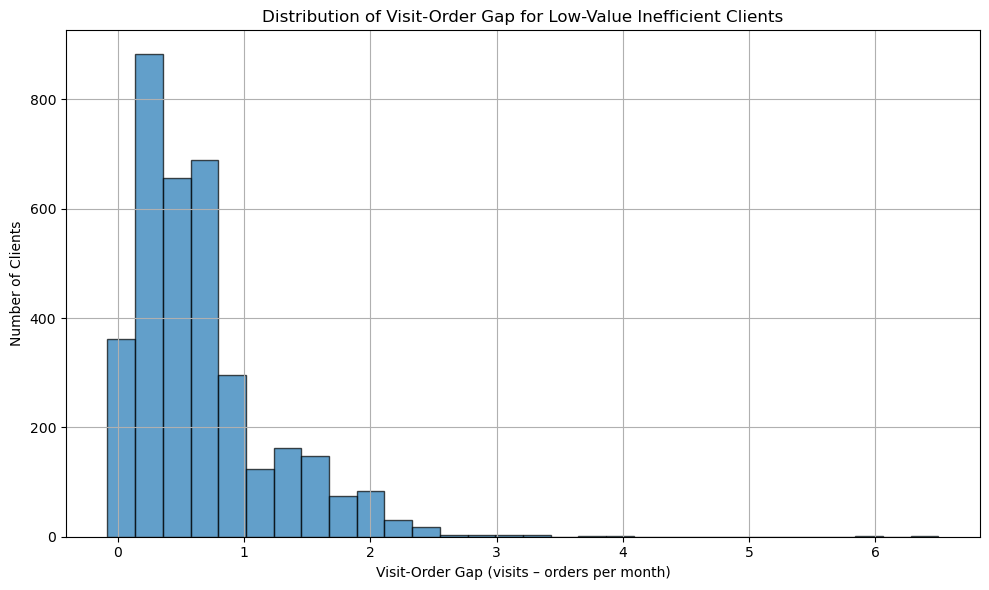

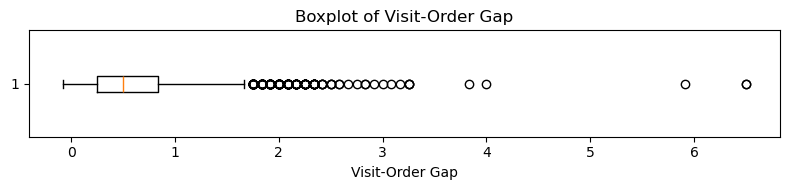

In [756]:
# Extracting the gap
lv_gap = lv_ineff['visit_order_gap'].dropna()

#  Histogram
plt.figure(figsize=(10, 6))
plt.hist(lv_gap, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Visit-Order Gap (visits – orders per month)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Visit-Order Gap for Low-Value Inefficient Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Boxplot
plt.figure(figsize=(8, 2))
plt.boxplot(lv_gap, vert=False)
plt.xlabel('Visit-Order Gap')
plt.title('Boxplot of Visit-Order Gap')
plt.tight_layout()
plt.show()

In [757]:
# Dfining bins and labels
lv_bins = [0, 1, 2, gap.max() + 1e-6]   # add a tiny epsilon so the max is included
lv_labels = ['0 ≤ gap < 1', '1 ≤ gap < 2', f'2 ≤ gap ≤ {gap.max():.1f}']

categories = pd.cut(lv_gap, bins=lv_bins, right=False, labels=lv_labels)


lv_pct = categories.value_counts(normalize=True) * 100


for label, p in lv_pct.items():
    print(f"{label}: {p:.2f}% of clients")

0 ≤ gap < 1: 79.01% of clients
1 ≤ gap < 2: 17.55% of clients
2 ≤ gap ≤ 6.5: 3.45% of clients


 ~79% under 1, only 3.45% are extreme.

 Insight: The majority of both groups hover around a low gap, meaning inefficiency is often subtle

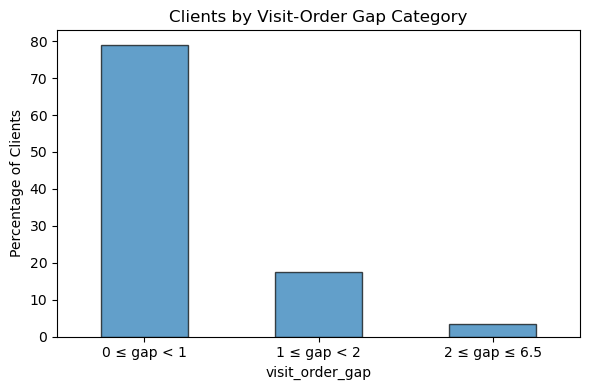

In [758]:
lv_pct.plot.bar(figsize=(6,4), edgecolor='black', alpha=0.7)
plt.ylabel('Percentage of Clients')
plt.title('Clients by Visit-Order Gap Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

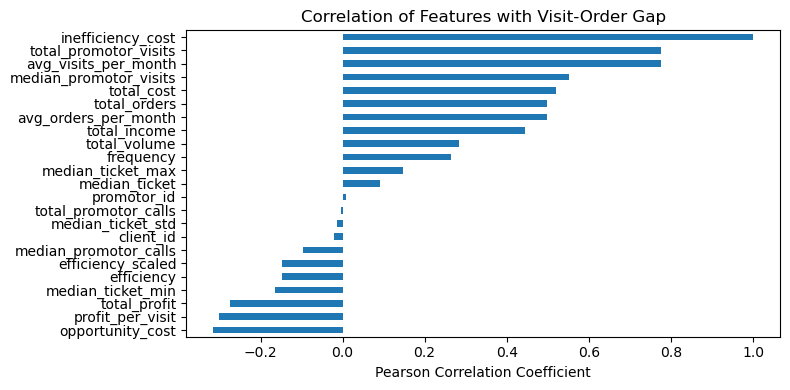

In [759]:
import numpy as np
numeric = lv_ineff.select_dtypes(include=[np.number])
lv_visit_corr = numeric.corr()['visit_order_gap'].drop('visit_order_gap').sort_values()

# 3) Plot bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
lv_visit_corr.plot(kind='barh')
plt.title('Correlation of Features with Visit-Order Gap')
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

 Low-Ticket: opportunity cost has a slightly negative or near zero correlation, it seems that in this group their inefficiencies don’t translate into high financial loss.



margin_segment
low_margin     3480
high_margin      60
Name: count, dtype: int64
                  count  mean  std   min  25%  50%  75%  max
margin_segment                                              
high_margin       60.00  0.34 0.22  0.00 0.17 0.25 0.50 0.92
low_margin     3,480.00  0.66 0.56 -0.08 0.25 0.50 0.83 6.50


<Figure size 800x500 with 0 Axes>

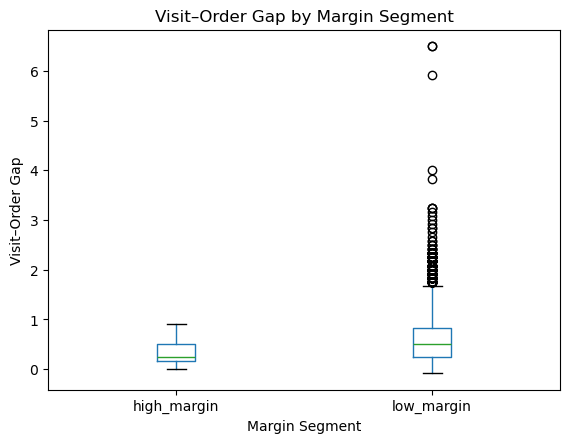

In [760]:
# 1) Computing a margin metric for each client
lv_ineff['profit_margin'] = lv_ineff['total_profit'] / lv_ineff['total_cost']

# 2) Split into “low-margin” vs “high-margin”
#    Here I use the median margin as a cut-off; you can also use quantiles (e.g. pd.qcut) or a business threshold.
lv_median_margin = lv_ineff['profit_margin'].median()
lv_ineff['margin_segment'] = lv_ineff['profit_margin'].apply(
    lambda m: 'low_margin' if m < median_margin else 'high_margin'
)

# 3) Checking how many in each segment
print(lv_ineff['margin_segment'].value_counts())

# 4) Comparing the visit–order gap distributions
summary = lv_ineff.groupby('margin_segment')['visit_order_gap'].describe()
print(summary)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
lv_ineff.boxplot('visit_order_gap', by='margin_segment', grid=False)
plt.suptitle('')
plt.title('Visit–Order Gap by Margin Segment')
plt.xlabel('Margin Segment')
plt.ylabel('Visit–Order Gap')
plt.show()

Insight: Low-margin clients are not only less profitable, they also show greater inefficiency (higher visit gaps), which justifies intervention.

In [761]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# 1) Summary stats
lv_grouped = lv_ineff.groupby('margin_segment')['visit_order_gap']
lv_summary = lv_grouped.agg(count='count', mean='mean', median='median', std='std')
print("Summary statistics by margin segment:\n", lv_summary)

# 2) Extract the two arrays
lv_high_gap = lv_ineff.loc[lv_ineff.margin_segment=='high_margin', 'visit_order_gap']
lv_low_gap  = lv_ineff.loc[lv_ineff.margin_segment=='low_margin',  'visit_order_gap']

# 3) Welch’s t-test (doesn’t assume equal variances)
lv_t_stat, lv_p_val = ttest_ind(lv_low_gap, lv_high_gap, equal_var=False)
print(f"\nWelch’s t-test: t = {lv_t_stat:.3f}, p = {lv_p_val:.3f}")

# 4) Mann–Whitney U (non-parametric)
lv_u_stat, lv_p_u = mannwhitneyu(lv_low_gap, lv_high_gap, alternative='two-sided')
print(f"Mann–Whitney U: U = {lv_u_stat:.3f}, p = {lv_p_u:.3f}")


Summary statistics by margin segment:
                 count  mean  median  std
margin_segment                          
high_margin        60  0.34    0.25 0.22
low_margin       3480  0.66    0.50 0.56

Welch’s t-test: t = 10.899, p = 0.000
Mann–Whitney U: U = 143709.000, p = 0.000


In [762]:
# 1) Select your extended feature list
features = [
    'avg_visits_per_month',
    'total_promotor_visits',
    'total_orders',
    'total_cost',
    'total_income',
    'total_profit',
    'frequency',
    'efficiency',
    'efficiency_scaled',
    'profit_margin'
]

X = lv_ineff[features]
y = lv_ineff['visit_order_gap']

# 2) Fit a simple RF
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 3) Examine importances
importances = pd.Series(model.feature_importances_, index=features)
print("Feature importances (RF):")
print(importances.sort_values(ascending=False))

# 4) (Optional) Quick 5-fold CV to get an R² estimate
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n5-fold CV R²: {scores.mean():.3f} ± {scores.std():.3f}")

Feature importances (RF):
avg_visits_per_month    0.37
total_promotor_visits   0.30
efficiency_scaled       0.12
efficiency              0.11
total_orders            0.04
total_cost              0.03
frequency               0.01
total_income            0.01
total_profit            0.01
profit_margin           0.01
dtype: float64

5-fold CV R²: 0.979 ± 0.011


### c. Regression Analysis

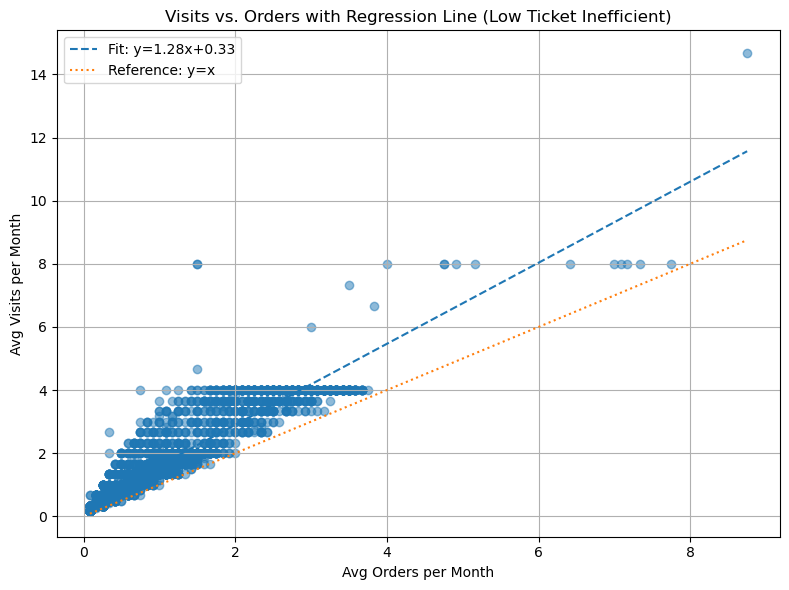

In [763]:
x = lv_ineff['avg_orders_per_month']
y = lv_ineff['avg_visits_per_month']

#  Fit a linear regression line
slope, intercept = np.polyfit(x, y, deg=1)

# Line endpoints
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x_line, y_line, linestyle='--', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.plot(x_line, x_line, linestyle=':', label='Reference: y=x')

plt.xlabel('Avg Orders per Month')
plt.ylabel('Avg Visits per Month')
plt.title('Visits vs. Orders with Regression Line (Low Ticket Inefficient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [764]:
# drop extreme order‐volume outliers
mask = lv_ineff['avg_orders_per_month'] <= 30
lv_typical = lv_ineff[mask]

# fit again
slope_t, intercept_t = np.polyfit(
    lv_typical['avg_orders_per_month'],
    lv_typical['avg_visits_per_month'],
    deg=1
)
print(f"Refit slope (orders≤30): {slope_t:.2f}")

Refit slope (orders≤30): 1.28


For every 1 additional order per month, promotors need to make 1.28 visits. Even less efficient than the high ticket group (1.24).

Even clients who place 0 orders still get ~0.33 visits per month similar baseline as the other group.

## 2.1 Grouping Clients
#### K-Means Clustering of Low-Ticket Inefficient Clients

In this section,  apply K-Means clustering to the High-Ticket Inefficient client segment to identify subgroups with similar behavioral and financial characteristics. This will help tailor strategies for reducing inefficiency and optimizing promotor visits.

#### Steps:
1. Select relevant features for clustering (orders, ticket size, visits, gap, costs).
2. Fit a K-Means model and assign cluster labels.
4. Summarize and visualize the resulting clusters.
5. Analyze the financial impact and visit optimization opportunities per cluster.

In [765]:
lv_clustering_features = [
    'total_orders',
    'median_ticket',
    'avg_visits_per_month',
    'avg_orders_per_month',
    'visit_order_gap',
    'inefficiency_cost',
    'opportunity_cost',
    
]
from sklearn.preprocessing import StandardScaler

X = df_lv_ineff[lv_clustering_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [766]:
from sklearn.cluster import KMeans

lv_kmeans = KMeans(n_clusters=2, random_state=42)
raw_labels = lv_kmeans.fit_predict(X_scaled)

# Shift 0→4 and 1→5 by adding 4
df_lv_ineff['cluster'] = raw_labels + 4

In [767]:
# 1. Total opportunity cost per cluster
lv_opportunity_cost_total = df_lv_ineff.groupby('cluster')['opportunity_cost'].sum().round(2).rename('Total_Opportunity_Cost')

# 2. Counting of clients per cluster
lv_cluster_counts = df_lv_ineff['cluster'].value_counts().rename('Clients')

# 3. Median values of relevant features
lv_cluster_medians = df_lv_ineff.groupby('cluster')[lv_clustering_features].mean().round(2)

# 4. Combining all into one summary table
df_lv_cluster_summary = pd.concat([lv_cluster_medians, lv_cluster_counts, lv_opportunity_cost_total], axis=1).reset_index()

# 5. Sorting by Cluster (descending)
df_lv_cluster_summary = df_lv_cluster_summary.sort_values(by='Clients', ascending=False).reset_index(drop=True)

df_lv_cluster_summary


,cluster,total_orders,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Clients,Total_Opportunity_Cost
0,4,8.21,57.43,1.10,0.68,0.42,6.23,4.18,2568,"10,737.48"
1,5,28.80,60.83,3.70,2.40,1.30,19.47,-3.56,972,"-3,455.96"


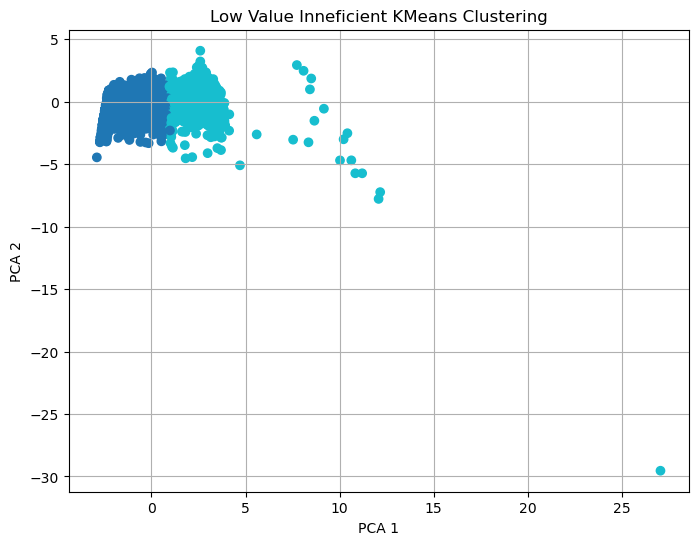

In [768]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

lv_pca = PCA(n_components=2)
lv_X_pca = lv_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(lv_X_pca[:, 0], lv_X_pca[:, 1], c=df_lv_ineff['cluster'], cmap='tab10')
plt.title('Low Value Inneficient KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [769]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_lv_ineff['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.502


In [770]:
# Compute count, mean and std of visit_order_gap per cluster
gap_stats = df_lv_ineff.groupby('cluster')['visit_order_gap'] \
           .agg(count='count', mean='mean', std='std' , max= 'max', min = 'min') \
           .round(2) \
           .reset_index()

print(gap_stats)

   cluster  count  mean  std  max  min
0        4   2568  0.42 0.26 1.50 0.00
1        5    972  1.30 0.63 6.50 0.17


In [771]:
df_lv_cluster_summary

,cluster,total_orders,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Clients,Total_Opportunity_Cost
0,4,8.21,57.43,1.10,0.68,0.42,6.23,4.18,2568,"10,737.48"
1,5,28.80,60.83,3.70,2.40,1.30,19.47,-3.56,972,"-3,455.96"


## 2.2 Cluster Description and Strategy

#### Cluster 4: “Occasional Shoppers” (2 568 clients)

62% of the low-ticket group 

Gap: 0.42 (almost one to one)

Behavior: Similar to a cluster in the high value group, but small median orders (€57).

Strategy: Eliminate their extra visits (target_gap → 0)

#### Cluster 5: “Regular Buyers with Returns” (972 clients)

38% of the low-ticket group

Gap: 1.3 extra visits

Behavior: Medium-small orders (€61) Net negative opportunity cost (–€3.5 K) because some order returns

Strategy: Cap their gap at 1 visit (target_gap → 1), leaving a small buffer but cutting the bulk of extra visits



In [772]:
import numpy as np
import pandas as pd


df_lv_ineff_optimized = df_lv_ineff.copy()

# Step 1: Map your two‐cluster targets
target_gap_map = {
    4: 0,   # Cluster 4 
    5: 1,   # Cluster 5
}

df_lv_ineff_optimized['target_gap'] = df_lv_ineff_optimized['cluster'].map(target_gap_map)

visit_cost= 15
logistic_cost= 10

# Step 3: Computing how much gap to reduce
df_lv_ineff_optimized['gap_reduction'] = (
      df_lv_ineff_optimized['visit_order_gap']
    - df_lv_ineff_optimized['target_gap']
).clip(lower=0)

# Step 4: Compute visits_removed by rounding gap to nearest whole visit
df_lv_ineff_optimized['visits_removed'] = (
    df_lv_ineff_optimized['gap_reduction']
      .round(0)        # round to nearest integer
      .astype(int)     # cast to int
)

# Step 5: Compute optimized remaining visits, never below zero
# compute new_visits on the correct df
df_lv_ineff_optimized['new_visits'] = (
    df_lv_ineff_optimized['avg_visits_per_month']
  - df_lv_ineff_optimized['visits_removed']
)
df_lv_ineff_optimized['new_visits'] = (
    df_lv_ineff_optimized['new_visits']
      .clip(lower=0)
      .astype(int)
)

# Step 5: Estimated savings = visits_removed × visit_cost
df_lv_ineff_optimized['estimated_savings'] = (
    df_lv_ineff_optimized['visits_removed'] * visit_cost
)

# Step 6: Recompute optimized_gap (for opportunity‐cost scaling)
df_lv_ineff_optimized['new_gap'] = (
      df_lv_ineff_optimized['visit_order_gap']
    - df_lv_ineff_optimized['gap_reduction']
).clip(lower=0)

# Step 7: Simulate optimized opportunity cost
df_lv_ineff_optimized['new_opportunity_cost'] = (
      df_lv_ineff_optimized['opportunity_cost']
    * (df_lv_ineff_optimized['new_gap'] 
       / df_lv_ineff_optimized['visit_order_gap'])
).replace([np.inf, -np.inf], 0) \
 .fillna(0)

# Step 8: Calculate recovered opportunity cost  
df_lv_ineff_optimized['recovered_opportunity_cost'] = (
      df_lv_ineff_optimized['opportunity_cost']
    - df_lv_ineff_optimized['new_opportunity_cost']
).clip(lower=0)

#Step 9: Calculating the new efficiency

orig_eff = df_lv_ineff_optimized['efficiency']   # your pre‐opt column

df_lv_ineff_optimized['Optimized_efficiency'] = np.where(
    df_lv_ineff_optimized['new_visits'] > 0,
    df_lv_ineff_optimized['avg_orders_per_month'] 
      / df_lv_ineff_optimized['new_visits'],
    orig_eff
)


#Step 10: Annual features

df_lv_ineff_optimized['new_annual_visits'] = (
    df_lv_ineff_optimized['new_visits']*12
)

df_lv_ineff_optimized['new_annual_visit_cost'] = (
    df_lv_ineff_optimized['new_visits']* visit_cost
)


df_lv_ineff_optimized['annual_estimated_savings'] = (
    df_lv_ineff_optimized['estimated_savings']* 12
)


df_lv_ineff_optimized['annual_recover_cost_op'] = (
    df_lv_ineff_optimized['recovered_opportunity_cost']* 12

)

df_lv_ineff_optimized['annual_removed_visits'] = (
    df_lv_ineff_optimized['visits_removed']* 12

)


cols_to_round = [
    'visit_order_gap','new_gap','gap_reduction',
    'new_visits','estimated_savings', 'Optimized_efficiency',
    'opportunity_cost','new_opportunity_cost',
    'recovered_opportunity_cost'
]
df_lv_ineff_optimized[cols_to_round] = df_lv_ineff_optimized[cols_to_round].round(2)

# Step 11: Quadrant name
df_lv_ineff_optimized['group'] = 'LowTicket_Inefficient'

# Step 12: Map cluster IDs to readable names
cluster_name_map = {
    4: 'Occasional Shoppers',
    5: 'Regular Shoppers with Returns'
}
df_lv_ineff_optimized['cluster_name'] = df_lv_ineff_optimized['cluster'].map(cluster_name_map)


# Set display format
pd.set_option('display.float_format','{:,.2f}'.format)

# Final check
pd.set_option('display.max_columns', None)
df_lv_ineff_optimized.head()


,client_id,channel,city,class,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost,cluster,target_gap,gap_reduction,visits_removed,new_visits,estimated_savings,new_gap,new_opportunity_cost,recovered_opportunity_cost,Optimized_efficiency,new_annual_visits,new_annual_visit_cost,annual_estimated_savings,annual_recover_cost_op,annual_removed_visits,group,cluster_name
1141,395867234,HR,Santander,LowTicket_Inefficient,76.78,554705087,24,"2,464.50","4,210.68",1680,2.00,4.00,2.00,4.00,2.00,0.50,30.00,0.00,0.00,"2,530.68",52.72,105.44,5,1,1.00,1,3,15,1.00,52.72,52.72,0.67,36,45,180,632.67,12,LowTicket_Inefficient,Regular Shoppers with Returns
303,176971189,AR,Barcelona,LowTicket_Inefficient,71.20,9820087,30,"12,518.69","4,436.00",2100,2.00,4.00,2.50,4.00,1.50,0.50,22.50,0.00,0.00,"2,336.00",48.67,73.00,5,1,0.50,0,4,0,1.00,48.67,24.33,0.62,48,60,0,292.00,0,LowTicket_Inefficient,Regular Shoppers with Returns
655,272030040,HR,Madrid,LowTicket_Inefficient,77.22,4222253,13,132.65,"2,191.47",970,1.00,4.00,1.08,2.67,1.58,0.25,23.75,0.00,0.00,"1,221.47",38.17,60.44,5,1,0.58,1,1,15,1.00,38.17,22.27,1.08,12,15,180,267.20,12,LowTicket_Inefficient,Regular Shoppers with Returns
1412,467036179,AR,CastellÃ³n,LowTicket_Inefficient,63.62,224182342,35,"12,863.82","4,795.51",2450,3.00,4.00,2.92,4.00,1.08,0.75,16.25,0.00,0.00,"2,345.51",48.86,52.94,5,1,0.08,0,4,0,1.00,48.86,4.07,0.73,48,60,0,48.86,0,LowTicket_Inefficient,Regular Shoppers with Returns
676,277787416,HR,Islas Baleares,LowTicket_Inefficient,69.12,469564819,26,"1,352.14","3,086.34",1820,2.00,4.00,2.17,4.00,1.83,0.50,27.50,0.00,0.00,"1,266.34",26.38,48.37,5,1,0.83,1,3,15,1.00,26.38,21.99,0.72,36,45,180,263.82,12,LowTicket_Inefficient,Regular Shoppers with Returns


In [773]:
df_lv_ineff_optimized.shape

(3540, 39)

LV MONTHLY VISITS REMOVED:

In [774]:
lv_monthly_visits_removed= df_lv_ineff_optimized['visits_removed'].sum()

print(f'The monthly visits removed with the strategy are: {lv_monthly_visits_removed}')

lv_annual_visits_removed= lv_monthly_visits_removed*12

print(f'The annual visits removed with the strategy are: {lv_annual_visits_removed}')

The monthly visits removed with the strategy are: 1146
The annual visits removed with the strategy are: 13752


LV MONTHLY VISITS REMOVED PER CLUSTER:

In [775]:
lv_clusters_removed_visits= df_hv_ineff_optimized.groupby('cluster')['visits_removed'].sum()
lv_clusters_removed_visits

cluster
0    831
1    798
2      1
3    123
Name: visits_removed, dtype: int64

## 2.3  Savings


#### Monthly Savings Analysis

This section quantifies the monthly impact of optimizing promotor visits for Low-Ticket Inefficient clients:

- **Estimated Cost Savings:** Direct reduction in promotor visit costs after applying the optimized strategy.
- **Recovered Opportunity Cost:** Additional value captured by reducing inefficiency and aligning visits with actual order patterns.
- **Total Impact:** Combined effect of both cost savings and recovered opportunity cost.

The following analyses and visualizations break down these savings by cluster, highlighting where the greatest improvements can be achieved. This provides actionable insights for prioritizing operational changes and maximizing monthly financial benefits.

In [776]:
# Estimated savings
lv_est_sav = (
    df_lv_ineff_optimized
      .groupby('cluster')['estimated_savings']
      .sum()
      .to_frame()
)

lv_est_sav.loc['Total'] = lv_est_sav['estimated_savings'].sum()

lv_est_sav.style.format({"estimated_savings": "{:,.0f}"})


,estimated_savings
cluster,
4,"11,985"
5,"5,205"
Total,"17,190"


#### Cluster 4 (“Occasional Shoppers”) : 

€11.9 K in direct visit-cost savings per month



#### Cluster 5 (“Regular Shoppers with Returns”) : 

€5.2 K in visit-cost savings per month

Altogether, fixing visit gaps in these high-ticket clients frees up €17.1 K. per month

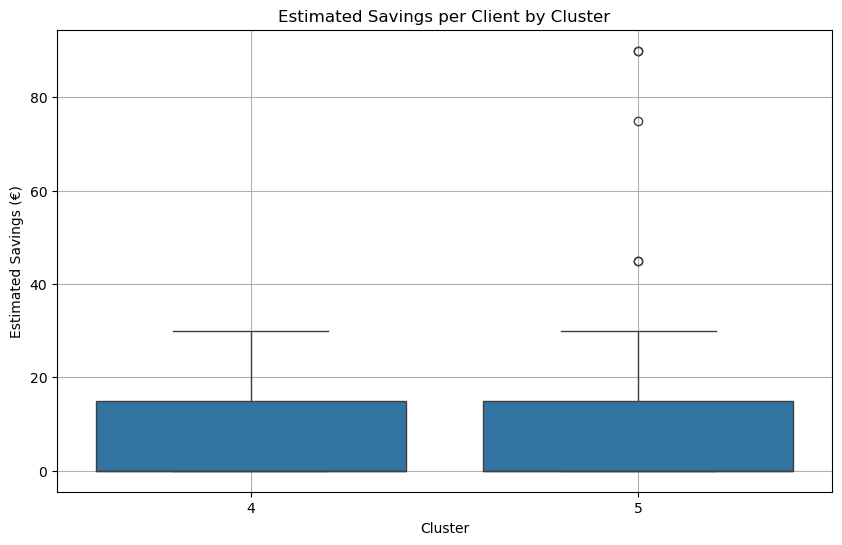

In [777]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='estimated_savings', data= df_lv_ineff_optimized)
plt.title('Estimated Savings per Client by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Estimated Savings (€)')
plt.grid(True)
plt.show()

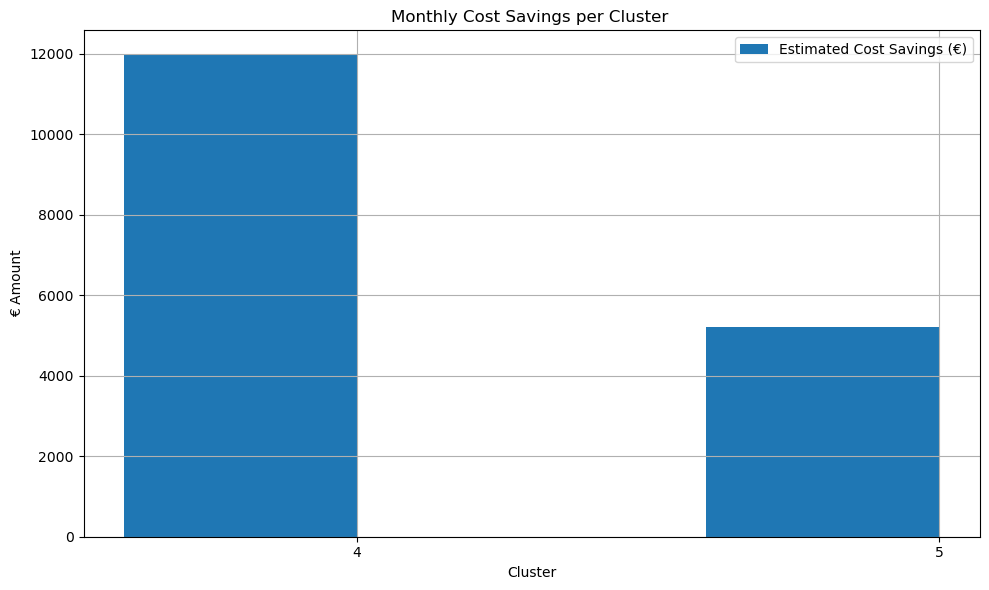

In [778]:
# Step 1: Group by cluster to sum the two key metrics
lv_cluster_financials = df_lv_ineff_optimized.groupby('cluster')[
    ['estimated_savings']
].sum().reset_index()

# Step 2: Set up for plotting
x = lv_cluster_financials['cluster']
bar_width = 0.4

plt.figure(figsize=(10, 6))

# Bar plot: cost savings
plt.bar(
    x - bar_width/2,
    lv_cluster_financials['estimated_savings'],
    width=bar_width,
    label='Estimated Cost Savings (€)'
)

plt.xlabel('Cluster')
plt.ylabel('€ Amount')
plt.title('Monthly Cost Savings per Cluster ')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

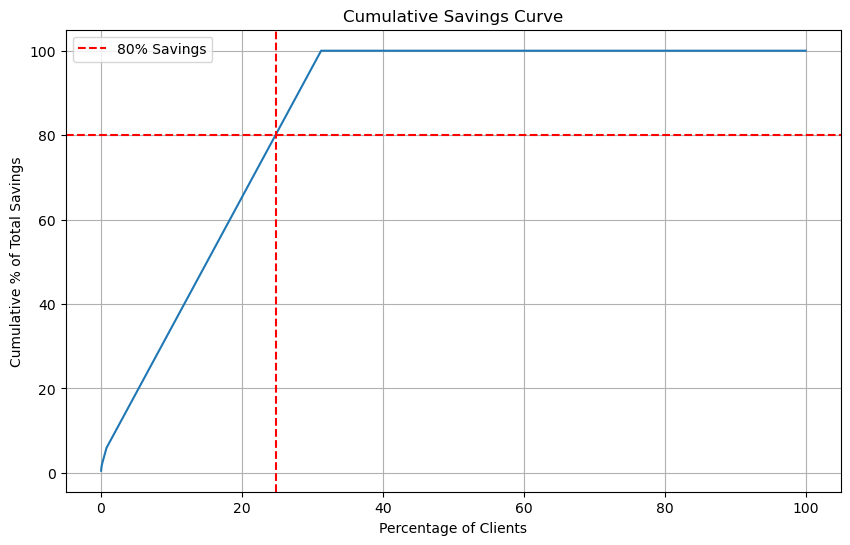

In [779]:
import numpy as np

# Sort clients by savings descending
lv_sorted_savings = df_lv_ineff_optimized['estimated_savings'].sort_values(ascending=False).reset_index(drop=True)

# Compute cumulative savings
lv_cumulative_savings = lv_sorted_savings.cumsum()
lv_total_savings = lv_cumulative_savings.iloc[-1]
lv_percent_savings = lv_cumulative_savings / lv_total_savings * 100
lv_percent_clients = np.arange(1, len(lv_sorted_savings) + 1) / len(lv_sorted_savings) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lv_percent_clients, lv_percent_savings)
plt.xlabel('Percentage of Clients')
plt.ylabel('Cumulative % of Total Savings')
plt.title('Cumulative Savings Curve')
plt.grid(True)
plt.axhline(80, color='r', linestyle='--', label='80% Savings')
plt.axvline(lv_percent_clients[np.searchsorted(lv_percent_savings, 80)], color='r', linestyle='--')
plt.legend()
plt.show()

### Pareto (80/20) rule:

80% of all possible low-ticket savings by focusing on roughly 25% of lowest-value clients each month.

In practice, that means Pascual only needs to “no extra visits / one extra visit” rules to the top 25% of low-ticket accounts to capture 80% of the total monthly benefit.

In [780]:
df_lv_sorted = df_lv_ineff_optimized.sort_values(  #Sort clients by their individual savings
    by='estimated_savings',
    ascending=False
).reset_index(drop=True)


df_lv_sorted['cum_savings'] = df_lv_sorted['estimated_savings'].cumsum()
lv_total = df_lv_sorted['estimated_savings'].sum()
df_lv_sorted['cum_savings_pct'] = df_lv_sorted['cum_savings'] / lv_total * 100

# Findin where cum_savings_pct ≥ 80
lv_cutoff_idx = df_lv_sorted.index[df_lv_sorted['cum_savings_pct'] >= 80][0]

# 4) Grab those top clients
lv_top_clients = df_lv_sorted.iloc[: lv_cutoff_idx + 1].copy()
print(f"Number of clients needed: {len(lv_top_clients)}")

Number of clients needed: 877


In [781]:
print(lv_top_clients['cluster'].value_counts(normalize=True) * 100)

cluster
4   70.13
5   29.87
Name: proportion, dtype: float64


#### Annual Savings Analysis

In [782]:
# Estimated savings
lv_est_sav = (
    df_lv_ineff_optimized
      .groupby('cluster')['estimated_savings']
      .sum()
      .to_frame()
)

lv_est_sav.loc['Total'] = lv_est_sav['estimated_savings'].sum()

lv_est_sav.style.format({"estimated_savings": "{:,.0f}"})


,estimated_savings
cluster,
4,"11,985"
5,"5,205"
Total,"17,190"


In [783]:
lv_annual = lv_est_sav.copy()
lv_annual.columns = ['Annual Savings']


mask = lv_annual.index != 'Total'
lv_annual.loc[mask, 'Annual Savings'] *= 12


lv_annual.loc['Total'] = lv_annual['Annual Savings'].sum()

print(lv_annual)

         Annual Savings
cluster                
4                143820
5                 62460
Total            223470


## 3. Merge Optimized Data Frames 

In [784]:
df_all_ineff = pd.concat(
    [df_hv_ineff_optimized, df_lv_ineff_optimized],
    ignore_index=True,
    sort=False
)
df_all_ineff

,client_id,channel,city,class,median_ticket,promotor_id,total_orders,total_volume,total_income,total_cost,frequency,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost,cluster,target_gap,gap_reduction,visits_removed,new_visits,estimated_savings,new_gap,new_opportunity_cost,recovered_opportunity_cost,Optimized_efficiency,new_annual_visits,new_annual_visit_cost,annual_estimated_savings,Annual_recover_cost_op,annual_removed_visits,group,cluster_name,annual_recover_cost_op
0,468285491,AR,Madrid,HighTicket_Inefficient,"1,316.04",677360818,58,"130,978.10","148,787.96",7540,4.50,8.00,4.83,8.00,3.17,0.56,47.50,0.00,0.00,"141,247.96","1,471.33","4,659.22",3,2,1.17,1,7,15,2.00,"2,942.67","1,716.56",0.69,84,105,180,"20,598.66",12,HighTicket_Inefficient,High Visits,NaN
1,515068007,AR,Barcelona,HighTicket_Inefficient,"19,350.00",417891187,5,"23,887.68","69,335.52",350,1.00,4.00,0.42,1.00,0.58,0.25,8.75,0.00,0.00,"68,985.52","5,748.79","3,353.46",2,0,0.58,1,0,15,0.00,0.00,"3,353.46",0.25,0,0,180,"40,241.55",12,HighTicket_Inefficient,VIP Client,NaN
2,156697011,AR,Alicante,HighTicket_Inefficient,"3,331.80",729030652,16,"218,271.30","80,323.68",1120,2.00,4.00,1.33,2.33,1.00,0.50,15.00,0.00,0.00,"79,203.68","2,828.70","2,828.70",3,2,0.00,0,2,0,1.00,"2,828.70",0.00,0.67,24,30,0,0.00,0,HighTicket_Inefficient,High Visits,NaN
3,158556116,AR,Tarragona,HighTicket_Inefficient,"1,713.60",513990441,65,"319,792.22","156,768.93",8450,7.00,8.00,5.42,6.67,1.25,0.88,18.75,0.00,0.00,"148,318.93","1,853.99","2,317.48",3,2,0.00,0,6,0,1.25,"2,317.48",0.00,0.90,72,90,0,0.00,0,HighTicket_Inefficient,High Visits,NaN
4,566053063,HR,Bilbao,HighTicket_Inefficient,"4,674.30",872524331,6,"5,320.00","35,758.29",420,1.00,4.00,0.50,1.67,1.17,0.25,17.50,0.00,0.00,"35,338.29","1,766.91","2,061.40",3,2,0.00,0,1,0,1.17,"2,061.40",0.00,0.50,12,15,0,0.00,0,HighTicket_Inefficient,High Visits,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,255278729,HR,Almeria,LowTicket_Inefficient,65.19,525968071,42,"3,038.19","2,870.06",5460,4.00,8.00,3.50,7.33,3.83,0.50,57.50,0.00,0.00,"-2,589.94",-29.43,-112.82,5,1,2.83,3,4,45,1.00,-29.43,0.00,0.88,48,60,540,NaN,36,LowTicket_Inefficient,Regular Shoppers with Returns,0.00
7673,605915475,HR,Madrid,LowTicket_Inefficient,59.08,275421941,59,"3,011.88","3,284.19",7550,5.00,8.00,4.92,8.00,3.08,0.62,46.25,0.00,0.00,"-4,265.81",-44.44,-137.01,5,1,2.08,2,6,30,1.00,-44.44,0.00,0.82,72,90,360,NaN,24,LowTicket_Inefficient,Regular Shoppers with Returns,0.00
7674,929815993,HR,Valladolid,LowTicket_Inefficient,60.68,634459297,48,970.08,"2,894.05",6240,4.00,8.00,4.00,8.00,4.00,0.50,60.00,0.00,0.00,"-3,345.95",-34.85,-139.41,5,1,3.00,3,5,45,1.00,-34.85,0.00,0.80,60,75,540,NaN,36,LowTicket_Inefficient,Regular Shoppers with Returns,0.00
7675,838267959,HR,Valladolid,LowTicket_Inefficient,52.59,256358709,57,"3,574.43","2,918.90",7410,4.50,8.00,4.75,8.00,3.25,0.56,48.75,0.00,0.00,"-4,491.10",-46.78,-152.04,5,1,2.25,2,6,30,1.00,-46.78,0.00,0.79,72,90,360,NaN,24,LowTicket_Inefficient,Regular Shoppers with Returns,0.00


In [785]:
counting = df_all_ineff[
    df_all_ineff['Optimized_efficiency']<1
]['Optimized_efficiency'].count()

counting

np.int64(5899)

In [786]:
df_all_ineff.shape

(7677, 40)

In [787]:

hv_efficient = clients[clients['class'] == 'HighTicket_Efficient'].copy()
lv_efficient = clients[clients['class'] == 'LowTicket_Efficient'].copy()

# now stack them into one
df_all_efficient = pd.concat(
    [hv_efficient, lv_efficient],
    ignore_index=True,
    sort=False
)

df_all_efficient.head()



,client_id,city,channel,promotor_id,frequency,efficiency,efficiency_scaled,total_orders,total_volume,total_income,total_cost,total_profit,median_ticket,median_ticket_min,median_ticket_max,median_ticket_std,median_promotor_visits,total_promotor_visits,median_promotor_calls,total_promotor_calls,class,zero_visit_flag,avg_orders_per_month,avg_visits_per_month,visit_order_gap,inefficiency_cost,profit_per_visit,opportunity_cost
0,100008050,Barcelona,AR,368568690,1.00,20.00,1.50,14,"3,982.00","1,905.59",140,"1,765.59",132.37,66.96,187.10,38.76,0.00,0.00,2.00,20.00,HighTicket_Efficient,True,1.17,0.00,-1.17,-17.50,0.00,-0.00
1,100046227,Barcelona,AR,454554895,4.00,2.00,0.10,16,"4,590.18","2,273.12",640,"1,633.12",132.64,83.21,276.33,48.60,2.00,8.00,2.00,8.00,HighTicket_Efficient,False,1.33,0.67,-0.67,-10.00,204.14,-136.09
2,100125158,CÃ¡diz,HR,483340469,3.00,3.00,0.15,25,"1,266.50","2,204.24",625,"1,579.24",85.81,26.15,173.95,41.51,1.00,10.00,0.00,0.00,HighTicket_Efficient,False,2.08,0.83,-1.25,-18.75,157.92,-197.41
3,100163544,CastellÃ³n,HR,988985367,2.00,20.00,1.50,14,867.17,"1,799.91",140,"1,659.91",114.88,22.82,323.57,75.34,0.00,0.00,0.00,0.00,HighTicket_Efficient,True,1.17,0.00,-1.17,-17.50,0.00,-0.00
4,100167744,Barcelona,AR,368568690,1.00,20.00,1.50,7,"3,054.47","1,037.01",70,967.01,118.94,70.15,247.43,68.58,0.00,0.00,2.00,12.00,HighTicket_Efficient,True,0.58,0.00,-0.58,-8.75,0.00,-0.00


In [788]:
cols_to_remove = [
    'zero_visit_flag',
    'visit_order_gap',
    'inefficiency_cost',
    'opportunity_cost',
    'efficiency_scaled'
]

df_all_efficient.drop(columns=cols_to_remove, inplace=True)

df_all_efficient.head()

,client_id,city,channel,promotor_id,frequency,efficiency,total_orders,total_volume,total_income,total_cost,total_profit,median_ticket,median_ticket_min,median_ticket_max,median_ticket_std,median_promotor_visits,total_promotor_visits,median_promotor_calls,total_promotor_calls,class,avg_orders_per_month,avg_visits_per_month,profit_per_visit
0,100008050,Barcelona,AR,368568690,1.00,20.00,14,"3,982.00","1,905.59",140,"1,765.59",132.37,66.96,187.10,38.76,0.00,0.00,2.00,20.00,HighTicket_Efficient,1.17,0.00,0.00
1,100046227,Barcelona,AR,454554895,4.00,2.00,16,"4,590.18","2,273.12",640,"1,633.12",132.64,83.21,276.33,48.60,2.00,8.00,2.00,8.00,HighTicket_Efficient,1.33,0.67,204.14
2,100125158,CÃ¡diz,HR,483340469,3.00,3.00,25,"1,266.50","2,204.24",625,"1,579.24",85.81,26.15,173.95,41.51,1.00,10.00,0.00,0.00,HighTicket_Efficient,2.08,0.83,157.92
3,100163544,CastellÃ³n,HR,988985367,2.00,20.00,14,867.17,"1,799.91",140,"1,659.91",114.88,22.82,323.57,75.34,0.00,0.00,0.00,0.00,HighTicket_Efficient,1.17,0.00,0.00
4,100167744,Barcelona,AR,368568690,1.00,20.00,7,"3,054.47","1,037.01",70,967.01,118.94,70.15,247.43,68.58,0.00,0.00,2.00,12.00,HighTicket_Efficient,0.58,0.00,0.00


In [789]:
import numpy as np
import pandas as pd


df_optimized_final = pd.concat(
    [df_all_efficient, df_all_ineff],
    ignore_index=True,
    sort=False
)


df_optimized_final['Optimized_efficiency'] = (
    df_optimized_final['Optimized_efficiency']
      .fillna(df_optimized_final['efficiency'])
      .round(2)
)


efficient_classes = ['HighTicket_Efficient', 'LowTicket_Efficient']
mask_eff = df_optimized_final['class'].isin(efficient_classes)

opt_columns = [
    'visit_order_gap', 'inefficiency_cost', 'opportunity_cost',
    'cluster', 'target_gap', 'gap_reduction', 'visits_removed',
    'new_visits', 'estimated_savings', 'new_opportunity_cost',
    'recovered_opportunity_cost', 'new_annual_visits',
    'new_annual_visit_cost', 'annual_estimated_savings',
    'Annual_recover_cost_op', 'annual_removed_visits',
    'cluster_name', 'new_gap', 'annual_recover_cost_op'
]

df_optimized_final.loc[mask_eff, opt_columns] = (
    df_optimized_final.loc[mask_eff, opt_columns]
      .fillna('N/A')
)

df_optimized_final['group'] = df_optimized_final['group'] \
    .fillna(df_optimized_final['class'])

df_optimized_final['new_visits'] = pd.to_numeric(
    df_optimized_final['new_visits'], errors='coerce'
).fillna(0).astype(int)

df_optimized_final['total_orders'] = pd.to_numeric(
    df_optimized_final['total_orders'], errors='coerce'
).fillna(0).astype(int)


df_optimized_final['annual_estimated_savings'] = pd.to_numeric(
    df_optimized_final['annual_estimated_savings'],
    errors='coerce'
).fillna(0)


ineff_mask = df_optimized_final['class'].isin([
    'HighTicket_Inefficient',
    'LowTicket_Inefficient'
])

df_optimized_final['new_total_cost'] = np.where(
    ineff_mask,
   
    df_optimized_final['total_cost'] 
      - df_optimized_final['annual_estimated_savings'],
    
    df_optimized_final['total_cost']
).round(2)

df_optimized_final


C:\Users\sedew\AppData\Local\Temp\ipykernel_26552\535646337.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_optimized_final.loc[mask_eff, opt_columns] = (
C:\Users\sedew\AppData\Local\Temp\ipykernel_26552\535646337.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_optimized_final.loc[mask_eff, opt_columns] = (
C:\Users\sedew\AppData\Local\Temp\ipykernel_26552\535646337.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['N/A' 'N/A' 'N/A' ... 'N/A' 'N/A' 'N/A']' h

,client_id,city,channel,promotor_id,frequency,efficiency,total_orders,total_volume,total_income,total_cost,total_profit,median_ticket,median_ticket_min,median_ticket_max,median_ticket_std,median_promotor_visits,total_promotor_visits,median_promotor_calls,total_promotor_calls,class,avg_orders_per_month,avg_visits_per_month,profit_per_visit,visit_order_gap,inefficiency_cost,opportunity_cost,cluster,target_gap,gap_reduction,visits_removed,new_visits,estimated_savings,new_gap,new_opportunity_cost,recovered_opportunity_cost,Optimized_efficiency,new_annual_visits,new_annual_visit_cost,annual_estimated_savings,Annual_recover_cost_op,annual_removed_visits,group,cluster_name,annual_recover_cost_op,new_total_cost
0,100008050,Barcelona,AR,368568690,1.00,20.00,14,"3,982.00","1,905.59",140,"1,765.59",132.37,66.96,187.10,38.76,0.00,0.00,2.00,20.00,HighTicket_Efficient,1.17,0.00,0.00,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A,N/A,20.00,N/A,N/A,0.00,N/A,N/A,HighTicket_Efficient,N/A,N/A,140.00
1,100046227,Barcelona,AR,454554895,4.00,2.00,16,"4,590.18","2,273.12",640,"1,633.12",132.64,83.21,276.33,48.60,2.00,8.00,2.00,8.00,HighTicket_Efficient,1.33,0.67,204.14,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A,N/A,2.00,N/A,N/A,0.00,N/A,N/A,HighTicket_Efficient,N/A,N/A,640.00
2,100125158,CÃ¡diz,HR,483340469,3.00,3.00,25,"1,266.50","2,204.24",625,"1,579.24",85.81,26.15,173.95,41.51,1.00,10.00,0.00,0.00,HighTicket_Efficient,2.08,0.83,157.92,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A,N/A,3.00,N/A,N/A,0.00,N/A,N/A,HighTicket_Efficient,N/A,N/A,625.00
3,100163544,CastellÃ³n,HR,988985367,2.00,20.00,14,867.17,"1,799.91",140,"1,659.91",114.88,22.82,323.57,75.34,0.00,0.00,0.00,0.00,HighTicket_Efficient,1.17,0.00,0.00,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A,N/A,20.00,N/A,N/A,0.00,N/A,N/A,HighTicket_Efficient,N/A,N/A,140.00
4,100167744,Barcelona,AR,368568690,1.00,20.00,7,"3,054.47","1,037.01",70,967.01,118.94,70.15,247.43,68.58,0.00,0.00,2.00,12.00,HighTicket_Efficient,0.58,0.00,0.00,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A,N/A,20.00,N/A,N/A,0.00,N/A,N/A,HighTicket_Efficient,N/A,N/A,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41945,255278729,Almeria,HR,525968071,4.00,0.50,42,"3,038.19","2,870.06",5460,"-2,589.94",65.19,NaN,NaN,NaN,8.00,NaN,0.00,0.00,LowTicket_Inefficient,3.50,7.33,-29.43,3.83,57.50,-112.82,5.00,1.00,2.83,3.00,4,45.00,1.00,-29.43,0.00,0.88,48.00,60.00,540.00,NaN,36.00,LowTicket_Inefficient,Regular Shoppers with Returns,0.00,"4,920.00"
41946,605915475,Madrid,HR,275421941,5.00,0.62,59,"3,011.88","3,284.19",7550,"-4,265.81",59.08,NaN,NaN,NaN,8.00,NaN,0.00,0.00,LowTicket_Inefficient,4.92,8.00,-44.44,3.08,46.25,-137.01,5.00,1.00,2.08,2.00,6,30.00,1.00,-44.44,0.00,0.82,72.00,90.00,360.00,NaN,24.00,LowTicket_Inefficient,Regular Shoppers with Returns,0.00,"7,190.00"
41947,929815993,Valladolid,HR,634459297,4.00,0.50,48,970.08,"2,894.05",6240,"-3,345.95",60.68,NaN,NaN,NaN,8.00,NaN,0.00,0.00,LowTicket_Inefficient,4.00,8.00,-34.85,4.00,60.00,-139.41,5.00,1.00,3.00,3.00,5,45.00,1.00,-34.85,0.00,0.80,60.00,75.00,540.00,NaN,36.00,LowTicket_Inefficient,Regular Shoppers with Returns,0.00,"5,700.00"
41948,838267959,Valladolid,HR,256358709,4.50,0.56,57,"3,574.43","2,918.90",7410,"-4,491.10",52.59,NaN,NaN,NaN,8.00,NaN,0.00,0.00,LowTicket_Inefficient,4.75,8.00,-46.78,3.25,48.75,-152.04,5.00,1.00,2.25,2.00,6,30.00,1.00,-46.78,0.00,0.79,72.00,90.00,360.00,NaN,24.00,LowTicket_Inefficient,Regular Shoppers with Returns,0.00,"7,050.00"


In [790]:
counting = df_optimized_final[
    df_optimized_final['Optimized_efficiency']<1
]['Optimized_efficiency'].count()

counting

np.int64(5899)

In [791]:
counting = df_optimized_final['Optimized_efficiency']

### 3.1 Final Output -  Clients by Class after Optimization (quadrants)

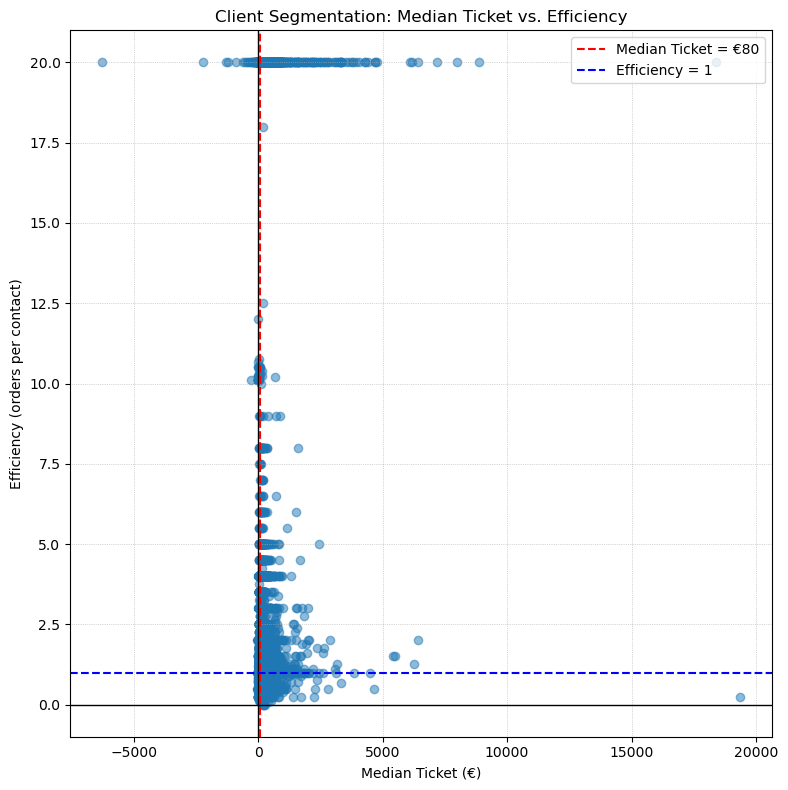

In [792]:
df_optimized_quadrant=df_optimized_final

x = df_optimized_quadrant['median_ticket']
y = df_optimized_quadrant['Optimized_efficiency']  # or 'Optimized_efficiency' if you want the post‐optimization value

plt.figure(figsize=(8, 8))

# scatter all points
plt.scatter(x, y, alpha=0.5)

# draw the main axes at zero
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)

# draw your business thresholds
plt.axvline(80, color='red', linestyle='--', label='Median Ticket = €80')
plt.axhline(1,  color='blue', linestyle='--', label='Efficiency = 1')

plt.xlabel('Median Ticket (€)')
plt.ylabel('Efficiency (orders per contact)')
plt.title('Client Segmentation: Median Ticket vs. Efficiency')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.tight_layout()
##plt.show()

OPTIMIZED CLASS DISTIBUTION

In [793]:

conditions = [
    (df_optimized_final['median_ticket'] >= 80) & (df_optimized_final['Optimized_efficiency'] >= 1),
    (df_optimized_final['median_ticket'] >= 80) & (df_optimized_final['Optimized_efficiency'] <  1),
    (df_optimized_final['median_ticket'] <  80) & (df_optimized_final['Optimized_efficiency'] >= 1),
    (df_optimized_final['median_ticket'] <  80) & (df_optimized_final['Optimized_efficiency'] <  1),
]

# Choices
choices = [
    'HighTicket_Efficient',
    'HighTicket_Inefficient',
    'LowTicket_Efficient',
    'LowTicket_Inefficient',
]

df_optimized_final['new_class'] = np.select(conditions, choices, default ='Unknown')


dist = (
    df_optimized_final['new_class']
      .value_counts()
      .rename_axis('class')
      .reset_index(name='count')
)

total = dist['count'].sum()
dist['percentage'] = dist['count'] / total

order = choices 
dist['class'] = pd.Categorical(dist['class'], categories=order, ordered=True)
dist = dist.sort_values('class').reset_index(drop=True)


print(dist)


                    class  count  percentage
0    HighTicket_Efficient  20497        0.49
1  HighTicket_Inefficient   2920        0.07
2     LowTicket_Efficient  15554        0.37
3   LowTicket_Inefficient   2979        0.07


## Overall Insights

1) We found two clear client segments in each ticket and inefficiency quadrants, with same overall inefficiencies behaviours, but different when segmenting each quadrant

2) In high-ticket, most inefficiencies come from “moderate visitors” and “efficient converters,” so we can standardize by either eliminating all extra visits or capping at two.

3) In low-ticket, a large group only slightly over-visits and a smaller group over-visits more but also returns orders. We solve that with a simple “no extra visits” or “one extra visit” rule.

4) Rather than rolling out changes to everyone, we’ll focus first on the top 25–35% of clients who drive the bulk of the waste— his Pareto approach minimizes effort while maximizing gain.

5) Finally, these prescriptions are easy to explain to the field team (“no visits beyond orders” or “allow one extra visit”), making adoption straightforward.

## Savings CSVs

In [794]:
import os

# Ensure the output directory exists
os.makedirs('/data/results', exist_ok=True)

# High-ticket optimized
df_hv_ineff_optimized.to_csv('data/results/hv_ineff_optimized.csv', index=False)

# Low-ticket optimized
df_lv_ineff_optimized.to_csv('data/results/lv_ineff_optimized.csv', index=False)

# Combined inefficient clients
df_all_ineff.to_csv('data/results/all_ineff_optimized.csv', index=False)

df_optimized_final.to_csv('data/results/df_optimized_final.csv', index=False)


OSError: Cannot save file into a non-existent directory: 'data\results'